<br><h1><center><em>An Exploratory Data Analysis of the Relationship Between Certian Fish Characteristics and Weight with Regression Analysis</em></center></h1><br>

<center><img src="reg_al.png" width=800></center>
<strong>Credit</strong>: Mehta, D. (2023, January 31). What is regression analysis? types, importance, and benefits. G2. https://www.g2.com/articles/regression-analysis 

### Objectives :

 In this project, we look to explore the relationship between certian fish characteristics and weight. We will look at how different measurements of different categories of fish impact weight. We will perform several types of regression analysis on the cleaned dataset.

- [X] Import Data
- [X] Clean Data
- [X] Perform Exploratory Analysis on Data
- [X] Draw Conclusion from Analyzed Data
- [X] Train Regression Models on Data
- [X] Plot Predicted and actual targets

In [182]:
# common imports
import numpy as np # linear algebra
import pandas as pd # data manipulation
import seaborn as sns # visualization
import matplotlib.pyplot as plt # visualization
from collections import Counter # method for counting values
import scipy.stats as stats

%matplotlib inline

In [183]:
# import custom class
from new_data_wrangler import Wrangler

In [184]:
# create DataFrame
df = Wrangler(pd.read_csv('fish.csv'))
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [185]:
df.info()

<class 'new_data_wrangler.Wrangler'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [186]:
# custom method dataframe_analysis() outputs desprictive statistics for dataframe, as well as null values and duplicated rows
df.dataframe_analysis()

Descriptive Statistics:
         count unique    top freq        mean         std     min      25%  \
Species    159      7  Perch   56         NaN         NaN     NaN      NaN   
Weight   159.0    NaN    NaN  NaN  398.326415  357.978317     0.0    120.0   
Length1  159.0    NaN    NaN  NaN    26.24717    9.996441     7.5    19.05   
Length2  159.0    NaN    NaN  NaN   28.415723   10.716328     8.4     21.0   
Length3  159.0    NaN    NaN  NaN   31.227044   11.610246     8.8    23.15   
Height   159.0    NaN    NaN  NaN    8.970994    4.286208  1.7284   5.9448   
Width    159.0    NaN    NaN  NaN    4.417486    1.685804  1.0476  3.38565   

            50%      75%     max  
Species     NaN      NaN     NaN  
Weight    273.0    650.0  1650.0  
Length1    25.2     32.7    59.0  
Length2    27.3     35.5    63.4  
Length3    29.4    39.65    68.0  
Height    7.786  12.3659  18.957  
Width    4.2485   5.5845   8.142  
------------------------------------------------------------

Number of

<div class="alert alert-block alert-info">
<b>Analysis:</b> At first glance, we see that we have no null values for the numerical columns. Though there are no null values, the weight column has a row that has a value of zero which is impossible.  
</div>

In [187]:
# find the row that contains 0 for the recorded weight
df[(df['Weight'] == 0)]

,Species,Weight,Length1,Length2,Length3,Height,Width
40,Roach,0.0,19.0,20.5,22.8,6.4752,3.3516


In [188]:
# copy dataframe
fish_df = df.copy()
fish_df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [189]:
# replace the 0 value in the weight column with a null value
fish_df.iloc[[40]] = fish_df.iloc[[40]].replace({0.0 : np.nan})

In [190]:
# now check for null values in columns
fish_df.isnull().sum()

Species    0
Weight     1
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

In [191]:
# use custom method to impute missing values in DataFrame
fish_df.complete_imputation()

In [192]:
# All null values are imputed
fish_df.isnull().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

In [193]:
# rename columns in DataFrame
fish_df.columns = ["species", "mass", "vertical_(cm)", "diagonal_(cm)", "cross_(cm)", "height_(cm)", "width_(cm)"]

In [194]:
fish_df.columns

Index(['species', 'mass', 'vertical_(cm)', 'diagonal_(cm)', 'cross_(cm)',
       'height_(cm)', 'width_(cm)'],
      dtype='object')

In [195]:
# change the datatype of columns that are an object to category
fish_df.category_datatype()

In [196]:
# show how many numerical and categorical colmns there are
category_columns, numerical_columns, category_with_hi_cardinality = fish_df.column_analysis()

Observations : 159
Variables : 7
Categorical Columns : 1
Numerical Columns : 6
Categorical Columns with High Cardinality : 0
Numerical Columns that are Categorical: 0


In [197]:
for col in category_columns:
    fish_df.categorical_column_summary(col)

           species  Ratio (%)
species                      
Perch           56      35.22
Bream           35      22.01
Roach           20      12.58
Pike            17      10.69
Smelt           14       8.81
Parkki          11       6.92
Whitefish        6       3.77
----------------------------------------


<div class="alert alert-block alert-info">
<b>Analysis:</b> Combined, Perch and Bream make up close to 50% of the fish at the fish market. 
</div>

In [198]:
for col in numerical_columns:
    fish_df.numerical_column_summary(col)

              mass
count   159.000000
mean    400.847468
std     356.564044
min       5.900000
5%        9.890000
10%      38.400000
20%     110.000000
30%     145.000000
40%     189.800000
50%     290.000000
60%     398.677975
70%     549.600000
80%     700.000000
90%     930.000000
95%    1000.000000
99%    1571.000000
max    1650.000000
----------------------------------------
       vertical_(cm)
count     159.000000
mean       26.247170
std         9.996441
min         7.500000
5%         11.300000
10%        13.440000
20%        18.320000
30%        20.000000
40%        22.020000
50%        25.200000
60%        28.500000
70%        31.620000
80%        34.680000
90%        38.200000
95%        41.190000
99%        56.000000
max        59.000000
----------------------------------------
       diagonal_(cm)
count     159.000000
mean       28.415723
std        10.716328
min         8.400000
5%         11.800000
10%        14.620000
20%        20.000000
30%        22.000000
40%      

<div class="alert alert-block alert-info">
<b>Analysis:</b> The average mass across the fish species is around 400. This average can be used later when we evaluate the error of the regression models.   
</div>

In [199]:
for col in category_columns:
    fish_df.target_cross_analysis_cat('mass', col)

           TARGET MEAN
species               
Pike        718.705882
Bream       617.828571
Whitefish   531.000000
Perch       382.239286
Roach       172.092373
Parkki      154.818182
Smelt        11.178571


<div class="alert alert-block alert-info">
<b>Analysis:</b> On average Pike fish weight more than any of the other fish species. Smelt fish on average weigh significally less than all the other fish species.   
</div>

In [200]:
for col in numerical_columns:
    if col == 'mass':
        continue
    else:
        fish_df.target_cross_analysis_num('mass', col)

mass
1650.0    59.00
1600.0    56.00
1550.0    56.00
1250.0    52.00
1100.0    39.55
          ...  
8.7       10.80
7.5       10.00
7.0       10.10
6.7        9.30
5.9        7.50
Name: vertical_(cm), Length: 101, dtype: float64
mass
1650.0    63.4
1600.0    60.0
1550.0    60.0
1250.0    56.0
1100.0    42.5
          ... 
8.7       11.3
7.5       10.5
7.0       10.6
6.7        9.8
5.9        8.4
Name: diagonal_(cm), Length: 101, dtype: float64
mass
1650.0    68.00
1600.0    64.00
1550.0    64.00
1250.0    59.70
1100.0    45.05
          ...  
8.7       12.60
7.5       11.60
7.0       11.60
6.7       10.80
5.9        8.80
Name: cross_(cm), Length: 101, dtype: float64
mass
1650.0    10.81200
1600.0     9.60000
1550.0     9.60000
1250.0    10.68630
1100.0    12.65635
            ...   
8.7        1.97820
7.5        1.97200
7.0        1.72840
6.7        1.73880
5.9        2.11200
Name: height_(cm), Length: 101, dtype: float64
mass
1650.0    7.48000
1600.0    6.14400
1550.0    6.14400
1250

<div class="alert alert-block alert-info">
<b>Analysis:</b> For the most part the various measurements of the fish correlate to the masses of the fish. 
</div>

<br><h1><center><em>Exploratory Data Analysis (EDA)</em></center></h1><br>

In [201]:
# import custom class for graphing data
from DataWrangler import Graphs
graph = Graphs(fish_df, 'ggplot')

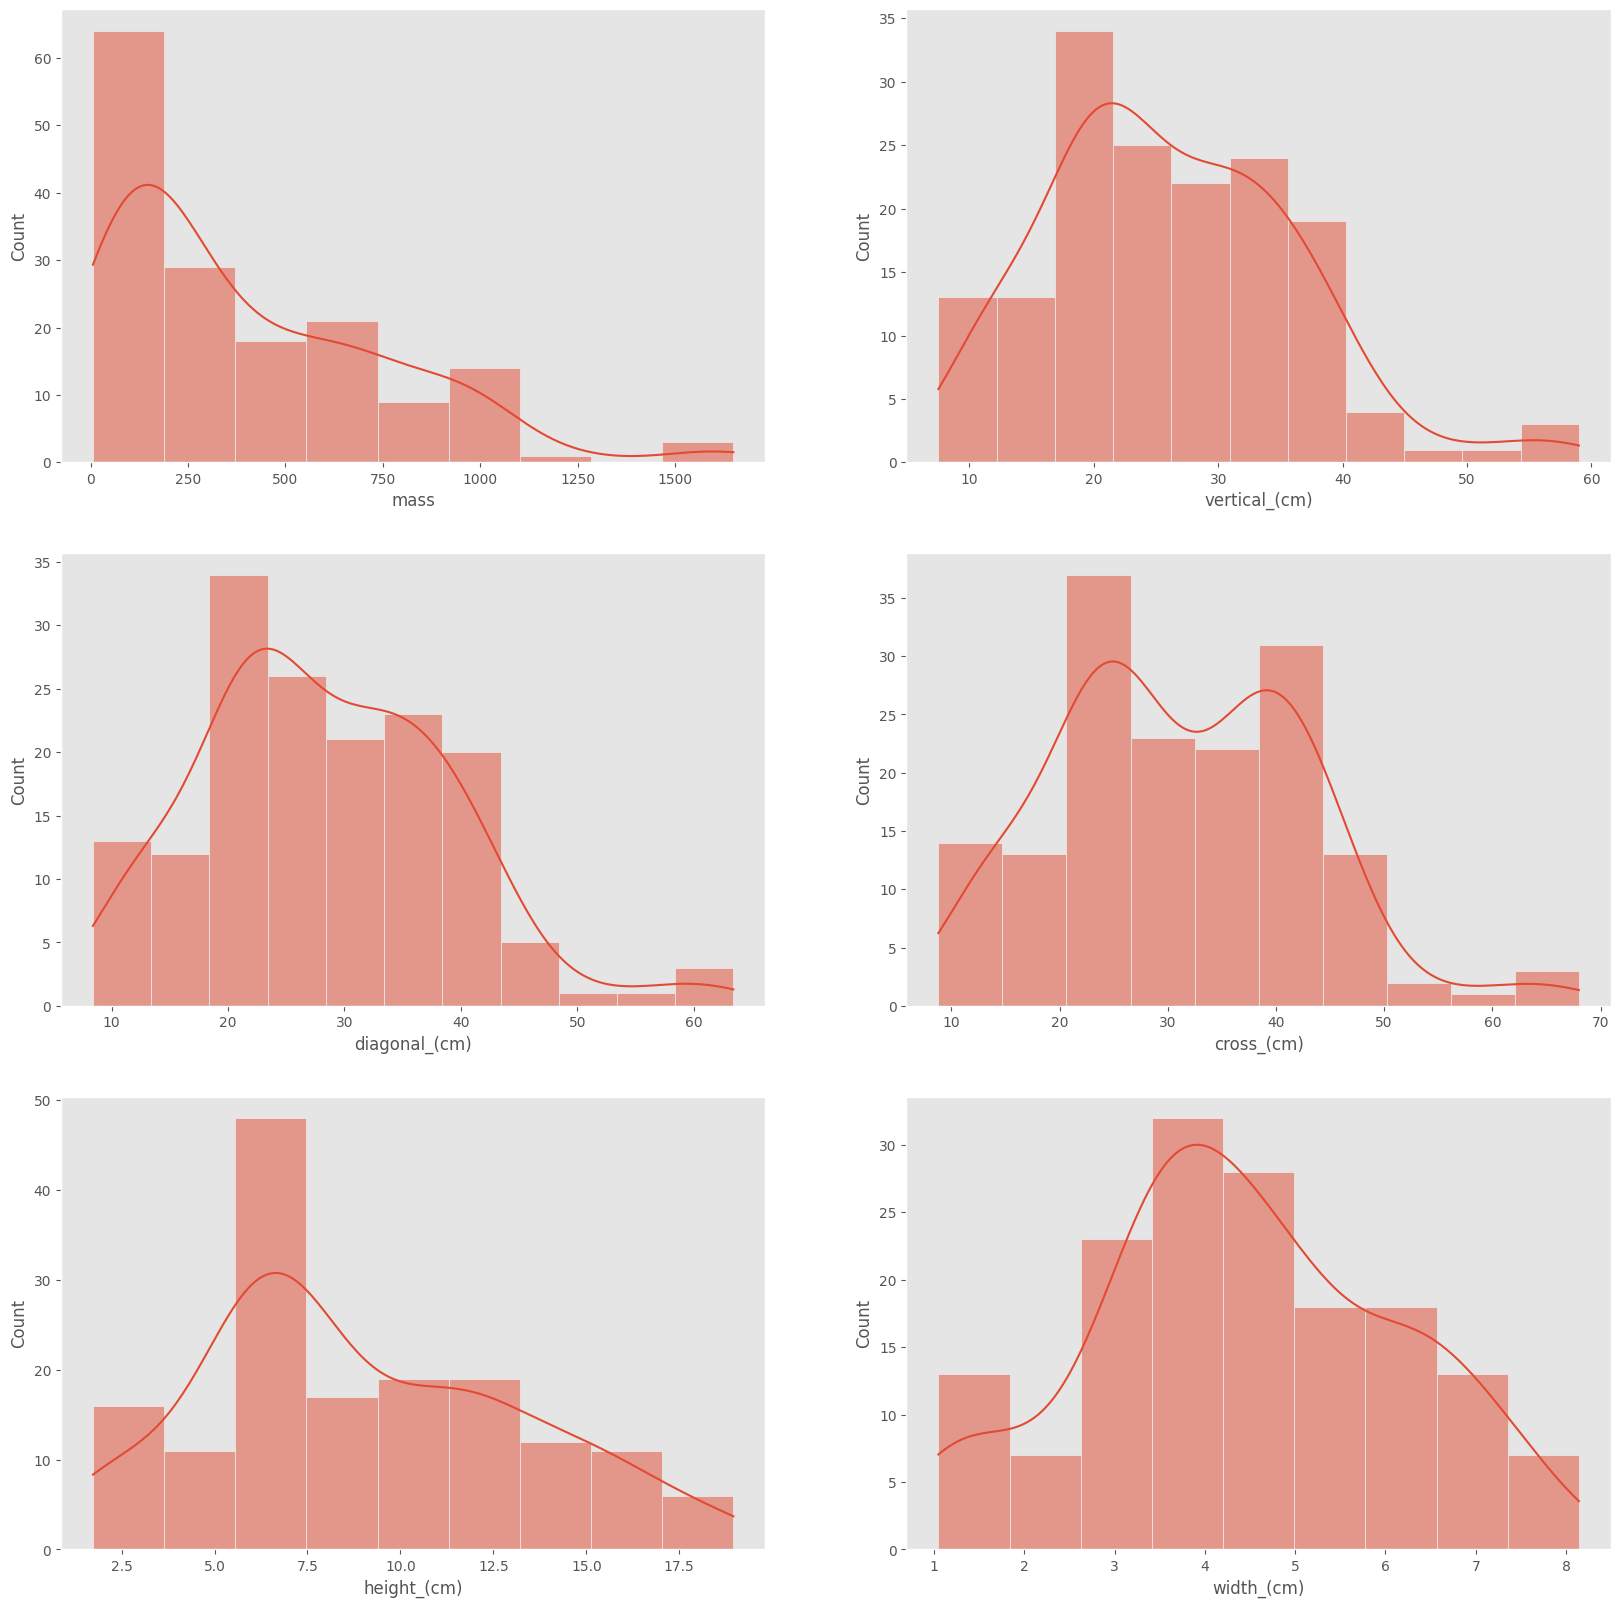

In [202]:
graph.histogram_subplots(3,2)

<div class="alert alert-block alert-info">
<b>Analysis:</b> Most of the fish have a mass under 500, with the vertical, diagonal, and cross measurements being around 20-40 centimeters. 
</div>

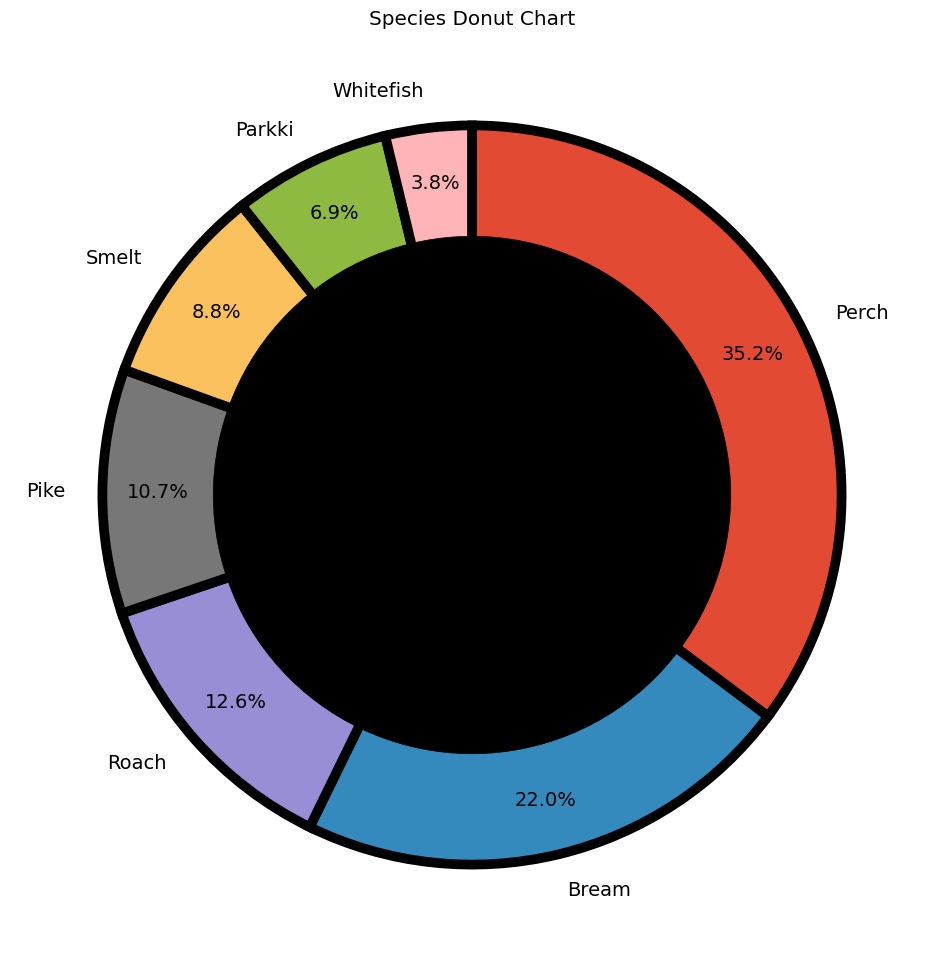

In [203]:
graph.donut_pie_chart('species')

<div class="alert alert-block alert-info">
<b>Analysis:</b> There are more Perch fish at the market than any of the other species of fish. 
</div>

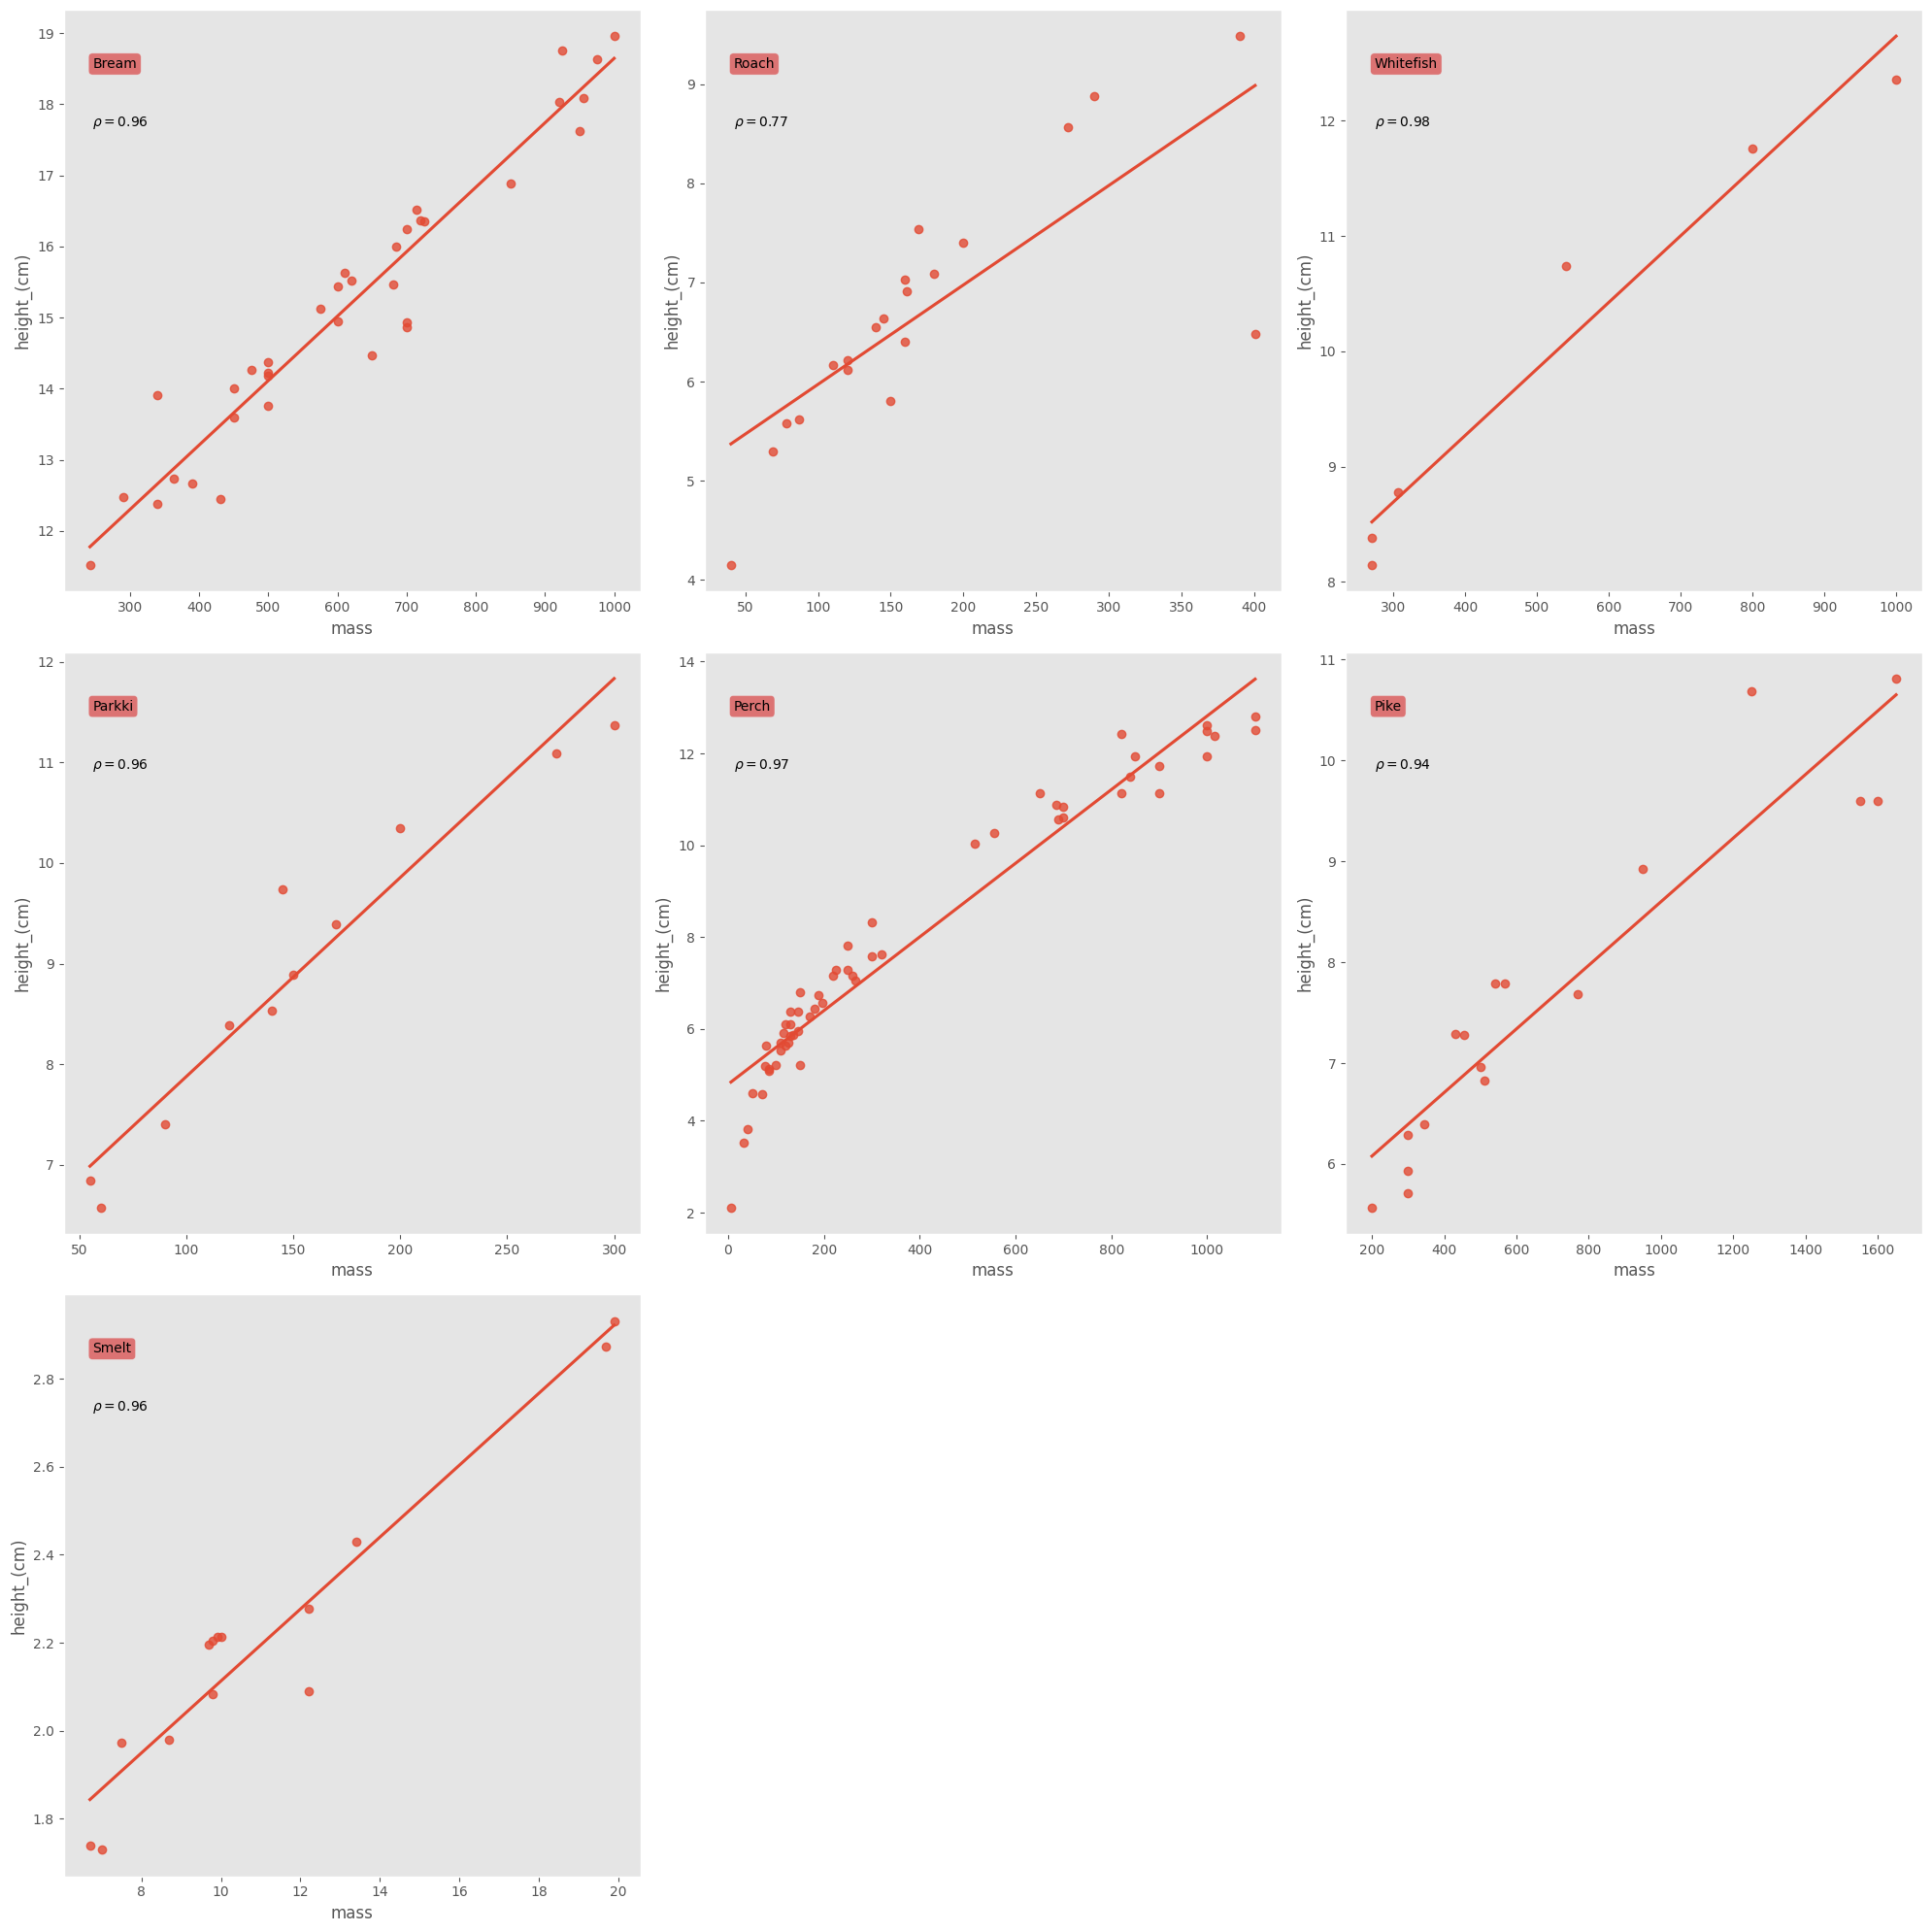

In [204]:
graph.regression_subplots('species', 'mass', 'height_(cm)', 3,3)

<div class="alert alert-block alert-info">
<b>Analysis:</b> We observe a high correlation between mass and height in all but one one species of fish. For every species of fish other than Roach the Pearson Correrlation Coefficient (Ρ) was over 0.9, which suggests a positive high correlation. Though the correlation for Roach was under 0.9, there was still a moderate positive correlation with the Pearson Correrlation Coefficient (Ρ) being over 0.7.
</div>

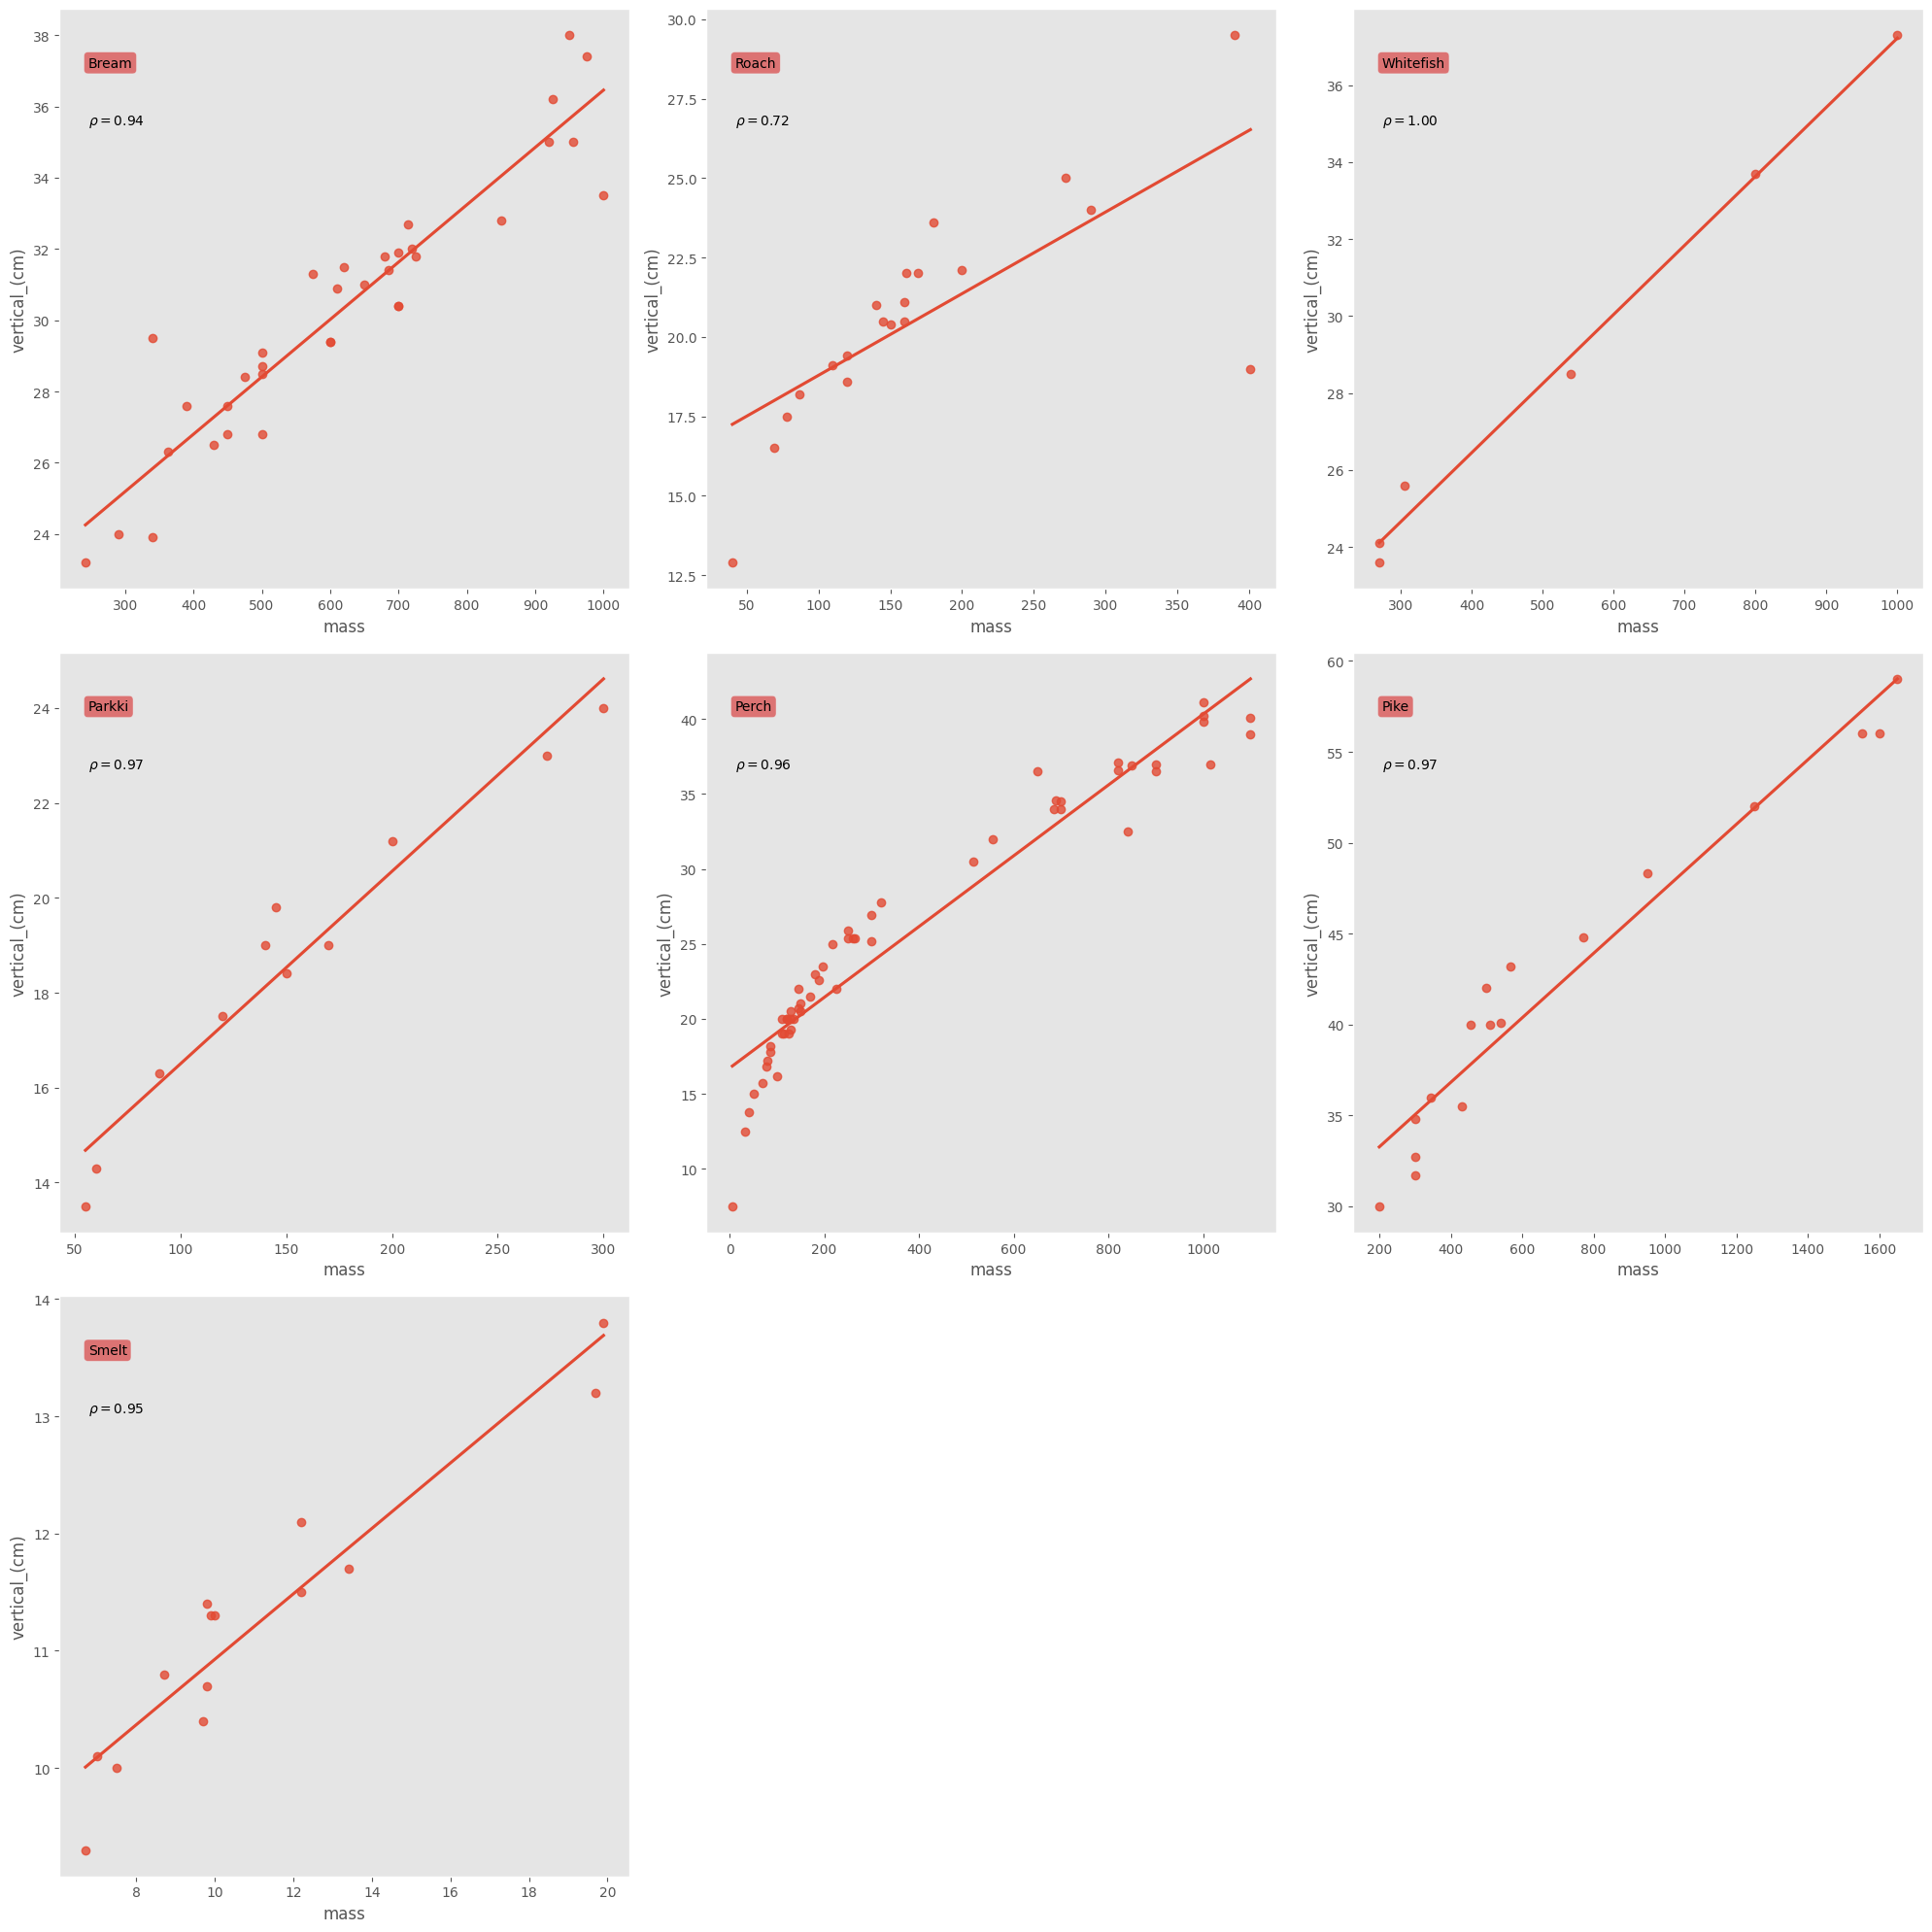

In [205]:
graph.regression_subplots('species', 'mass', 'vertical_(cm)', 3,3)

<div class="alert alert-block alert-info">
<b>Analysis:</b> We observe a high correlation between mass and vertical measurement in all but one one species of fish. For every species of fish other than Roach the Pearson Correrlation Coefficient (Ρ) was over 0.9, which suggests a positive high correlation. Though the correlation for Roach was under 0.9, there was still a moderate positive correlation with the Pearson Correrlation Coefficient (Ρ) being over 0.7.
</div>

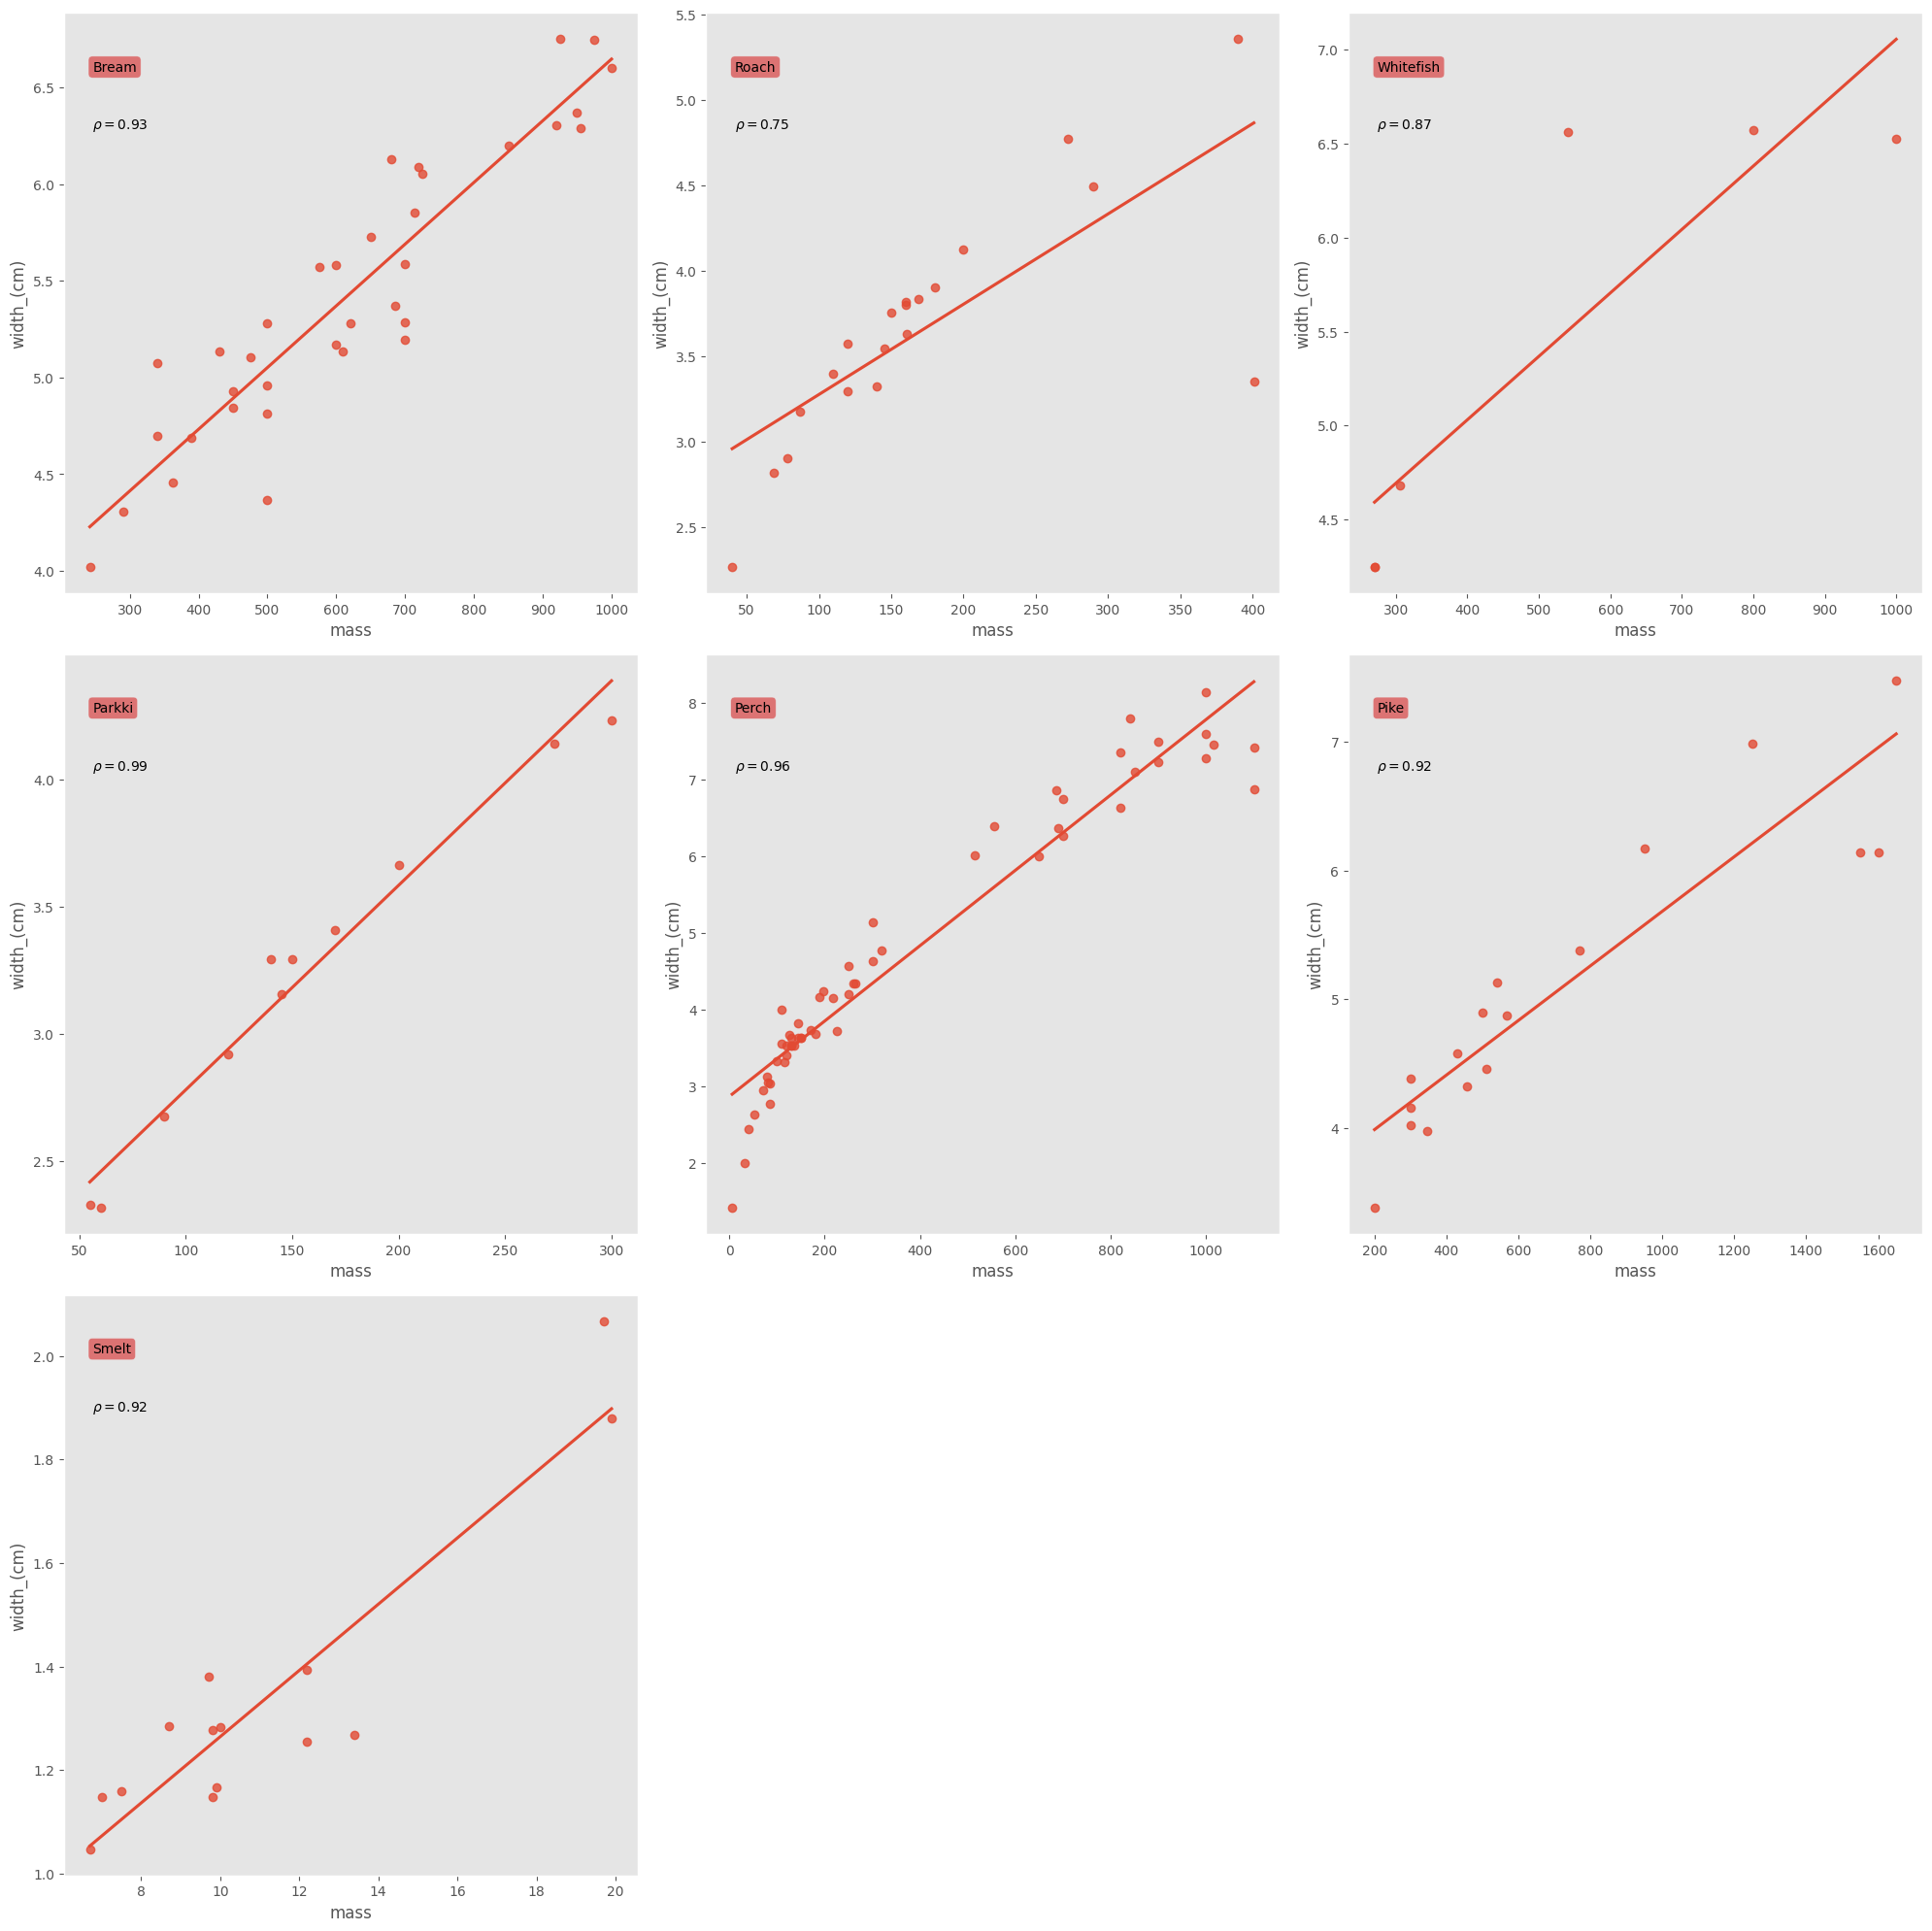

In [206]:
graph.regression_subplots('species', 'mass', 'width_(cm)', 3,3)

<div class="alert alert-block alert-info">
<b>Analysis:</b> We observe a high correlation between mass and width measurements in all but two species of fish. For every species of fish other than Roach and Whitefish the Pearson Correrlation Coefficient (Ρ) was over 0.9, which suggests a positive high correlation. Though the correlation for Roach and Whitefish was under 0.9, there was still a moderate positive correlation with the Pearson Correrlation Coefficient (Ρ) being over 0.7.
</div>

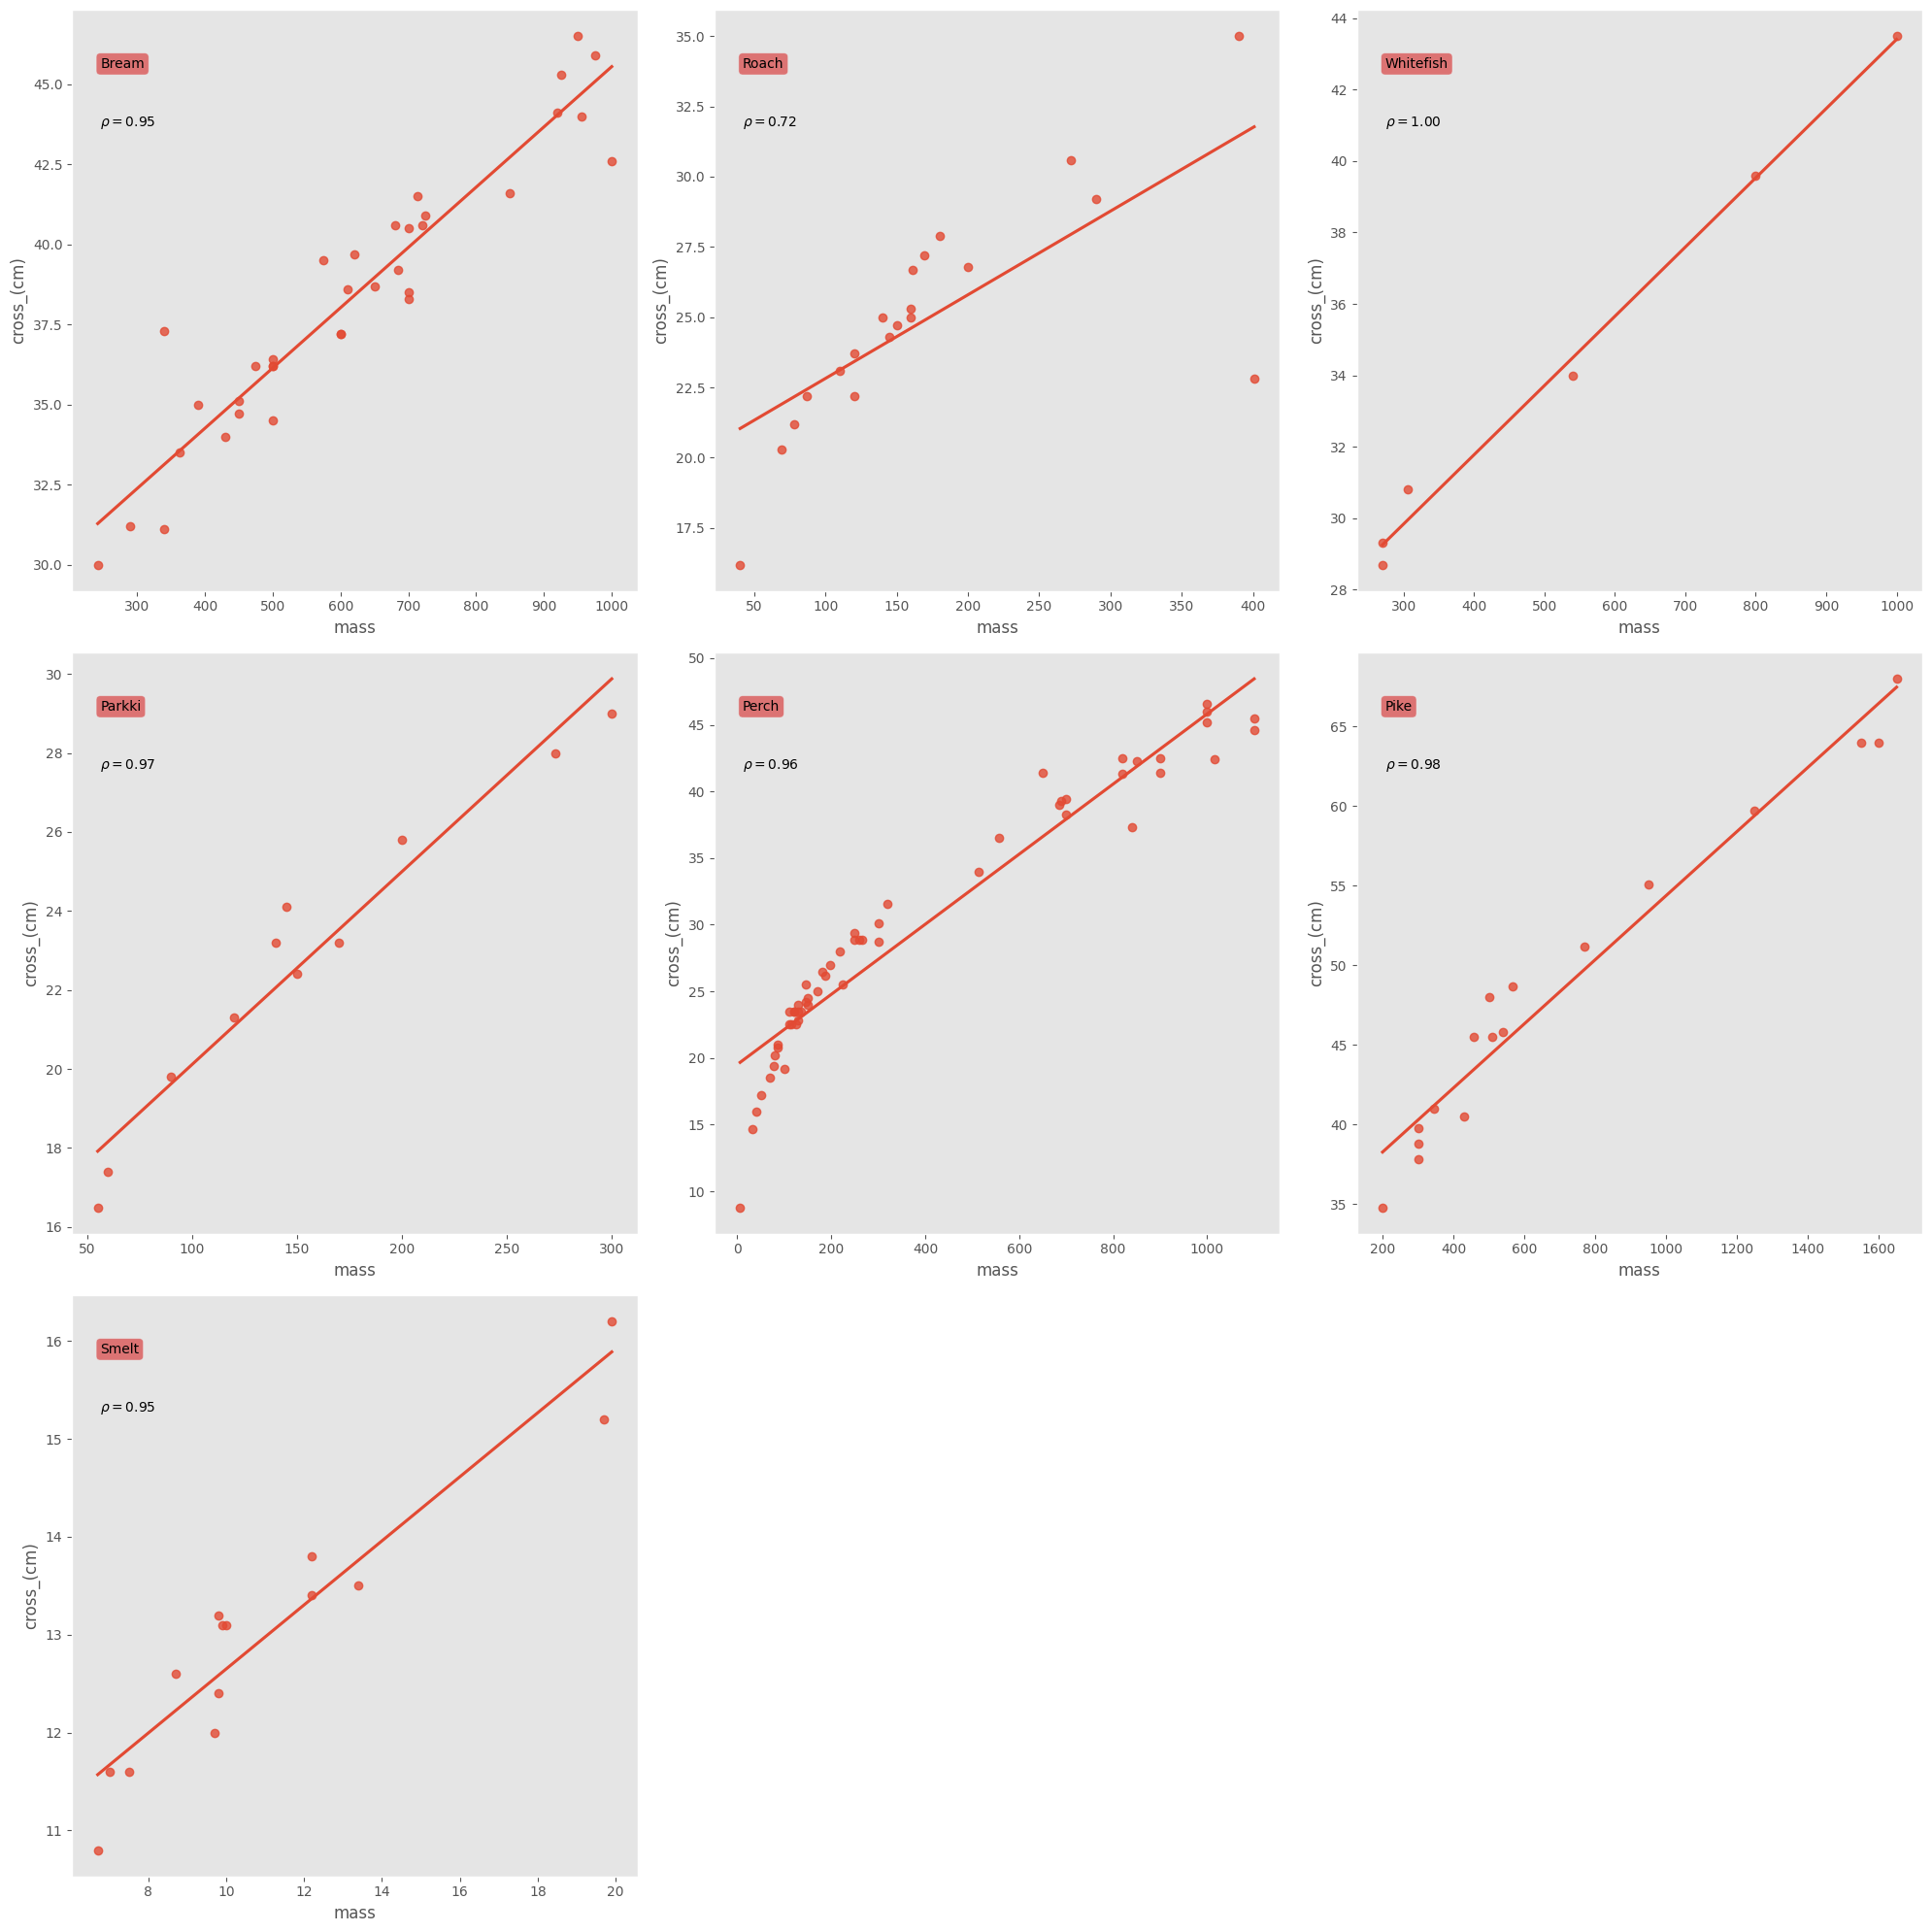

In [207]:
graph.regression_subplots('species', 'mass', 'cross_(cm)', 3,3)

<div class="alert alert-block alert-info">
<b>Analysis:</b> We observe a high correlation between mass and cross measurements in all but one one species of fish. For every species of fish other than Roach the Pearson Correrlation Coefficient (Ρ) was over 0.9, which suggests a positive high correlation. Though the correlation for Roach was under 0.9, there was still a moderate positive correlation with the Pearson Correrlation Coefficient (Ρ) being over 0.7.
</div>

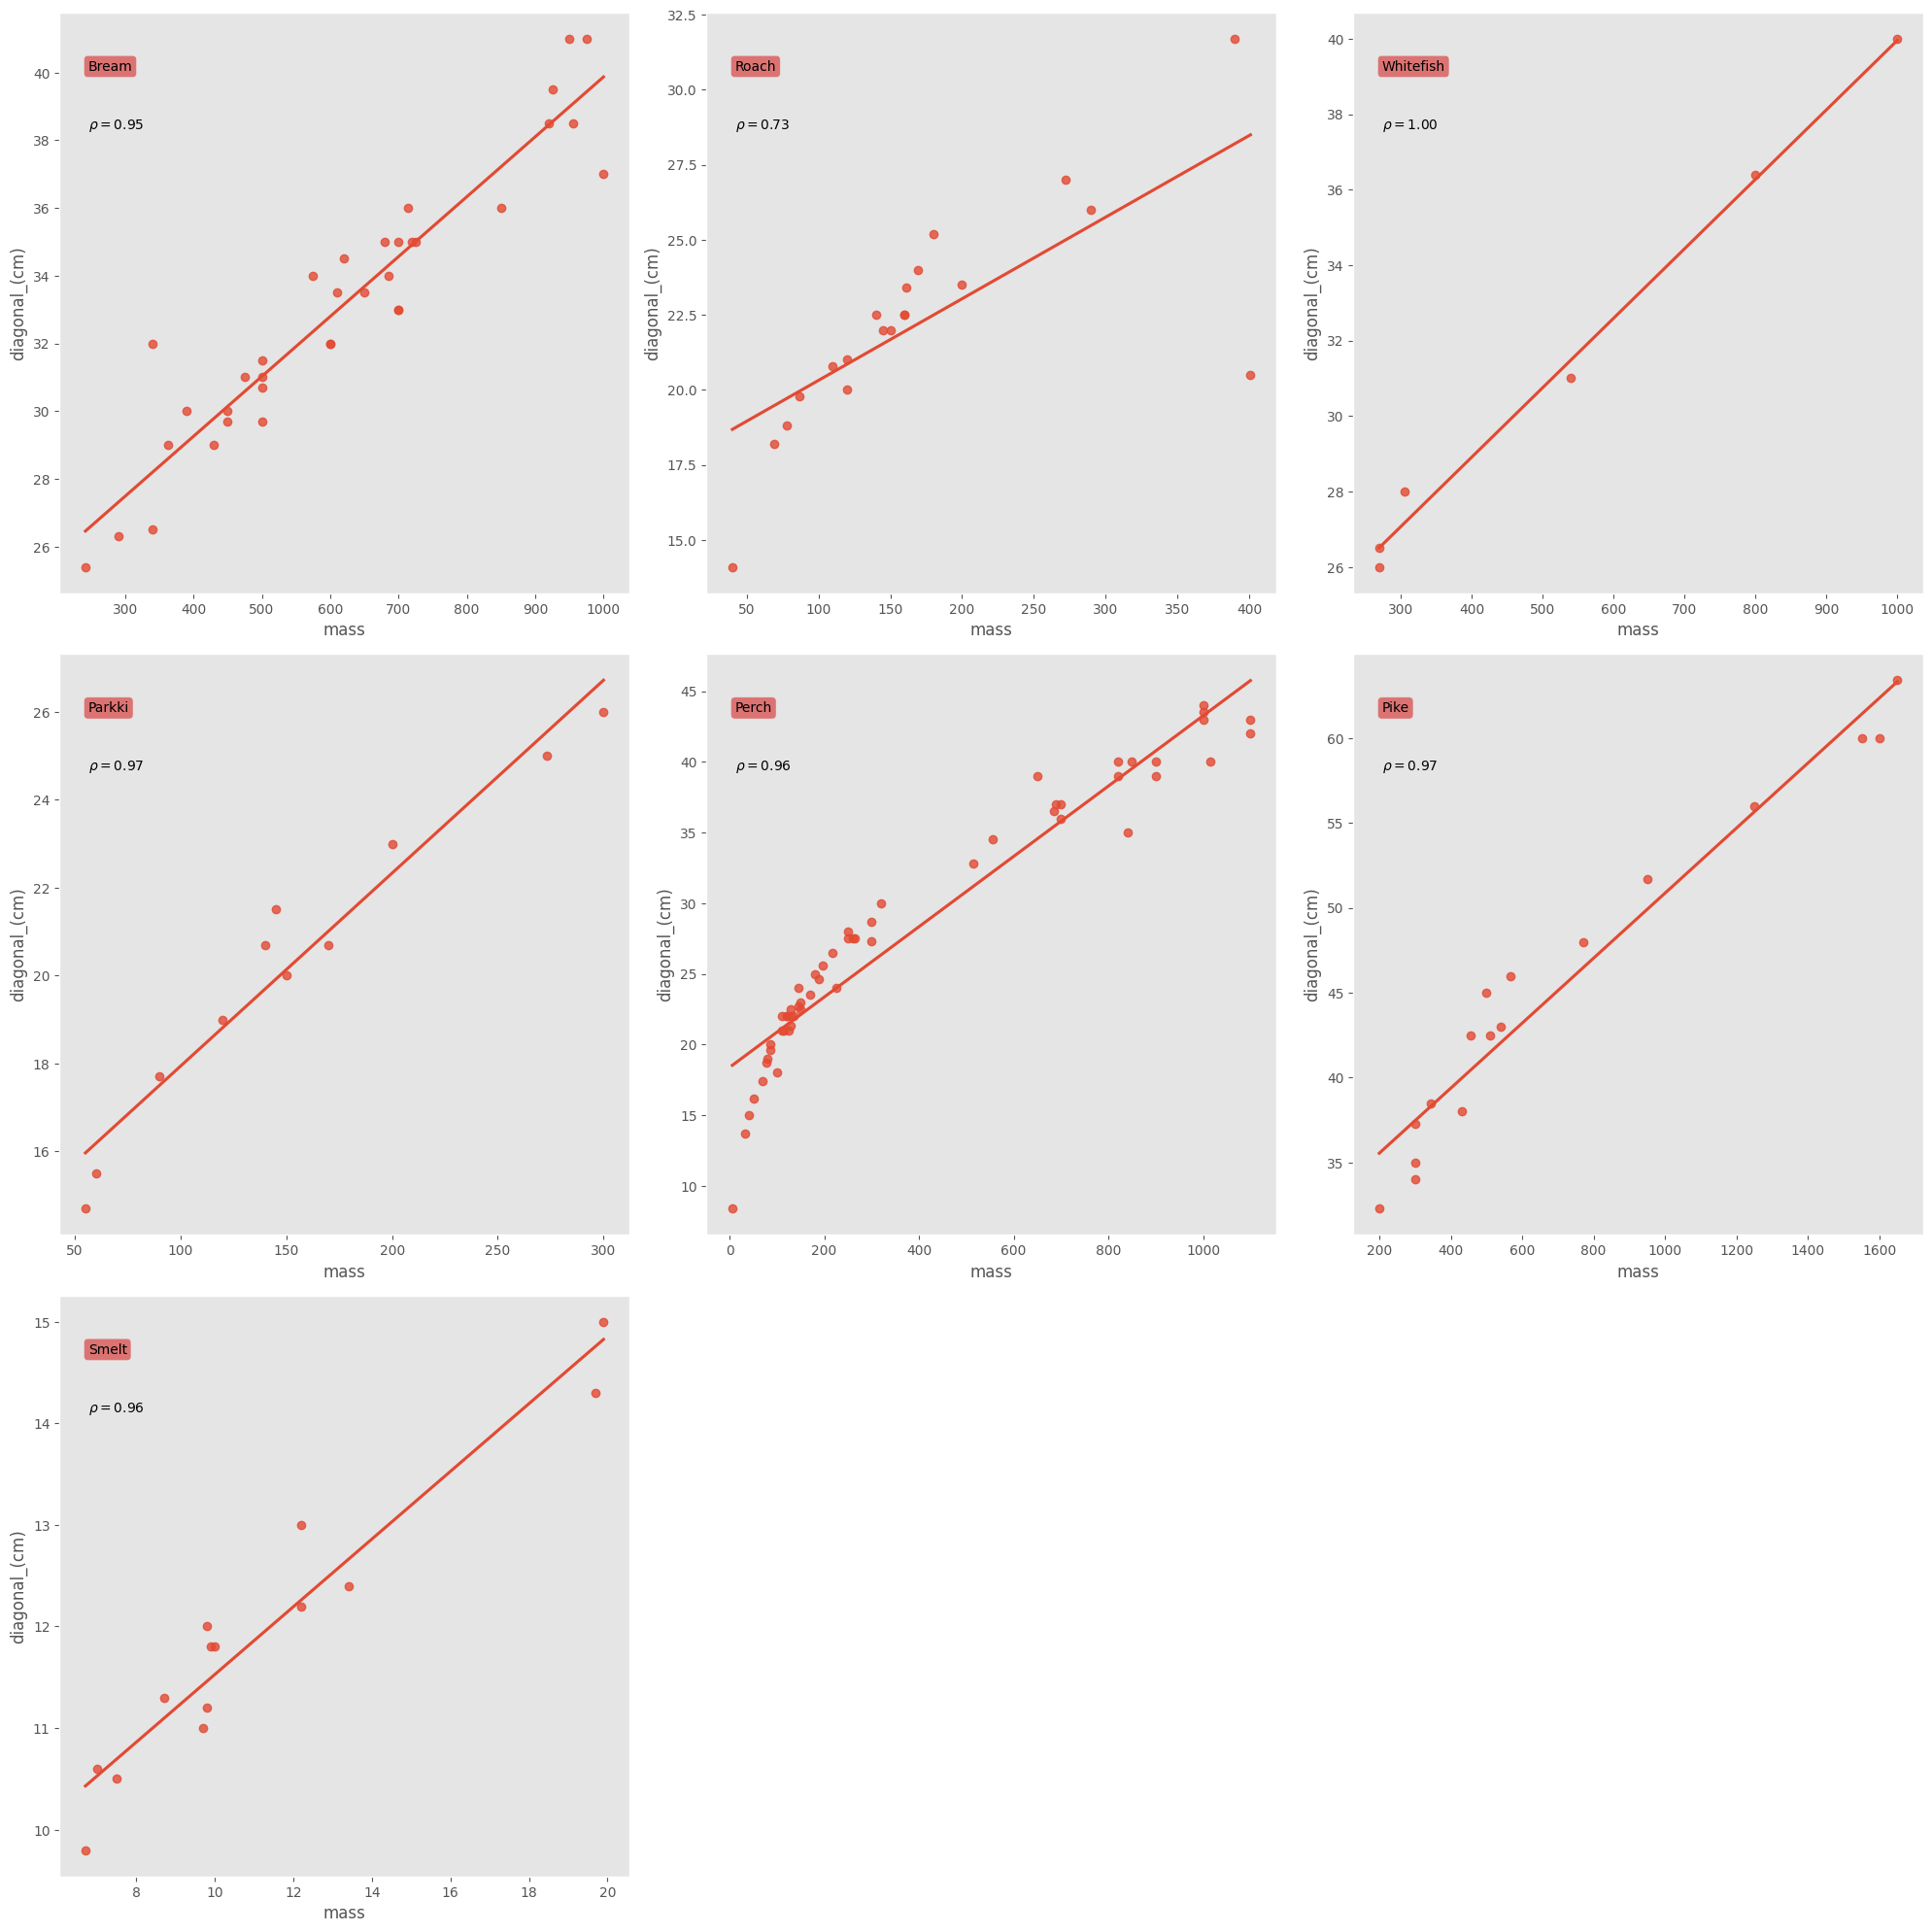

In [208]:
graph.regression_subplots('species', 'mass', 'diagonal_(cm)', 3,3)

<div class="alert alert-block alert-info">
<b>Analysis:</b> We observe a high correlation between mass and diagnonal length measurements in all but one one species of fish. For every species of fish other than Roach the Pearson Correrlation Coefficient (Ρ) was over 0.9, which suggests a positive high correlation. Though the correlation for Roach was under 0.9, there was still a moderate positive correlation with the Pearson Correrlation Coefficient (Ρ) being over 0.7.
</div>

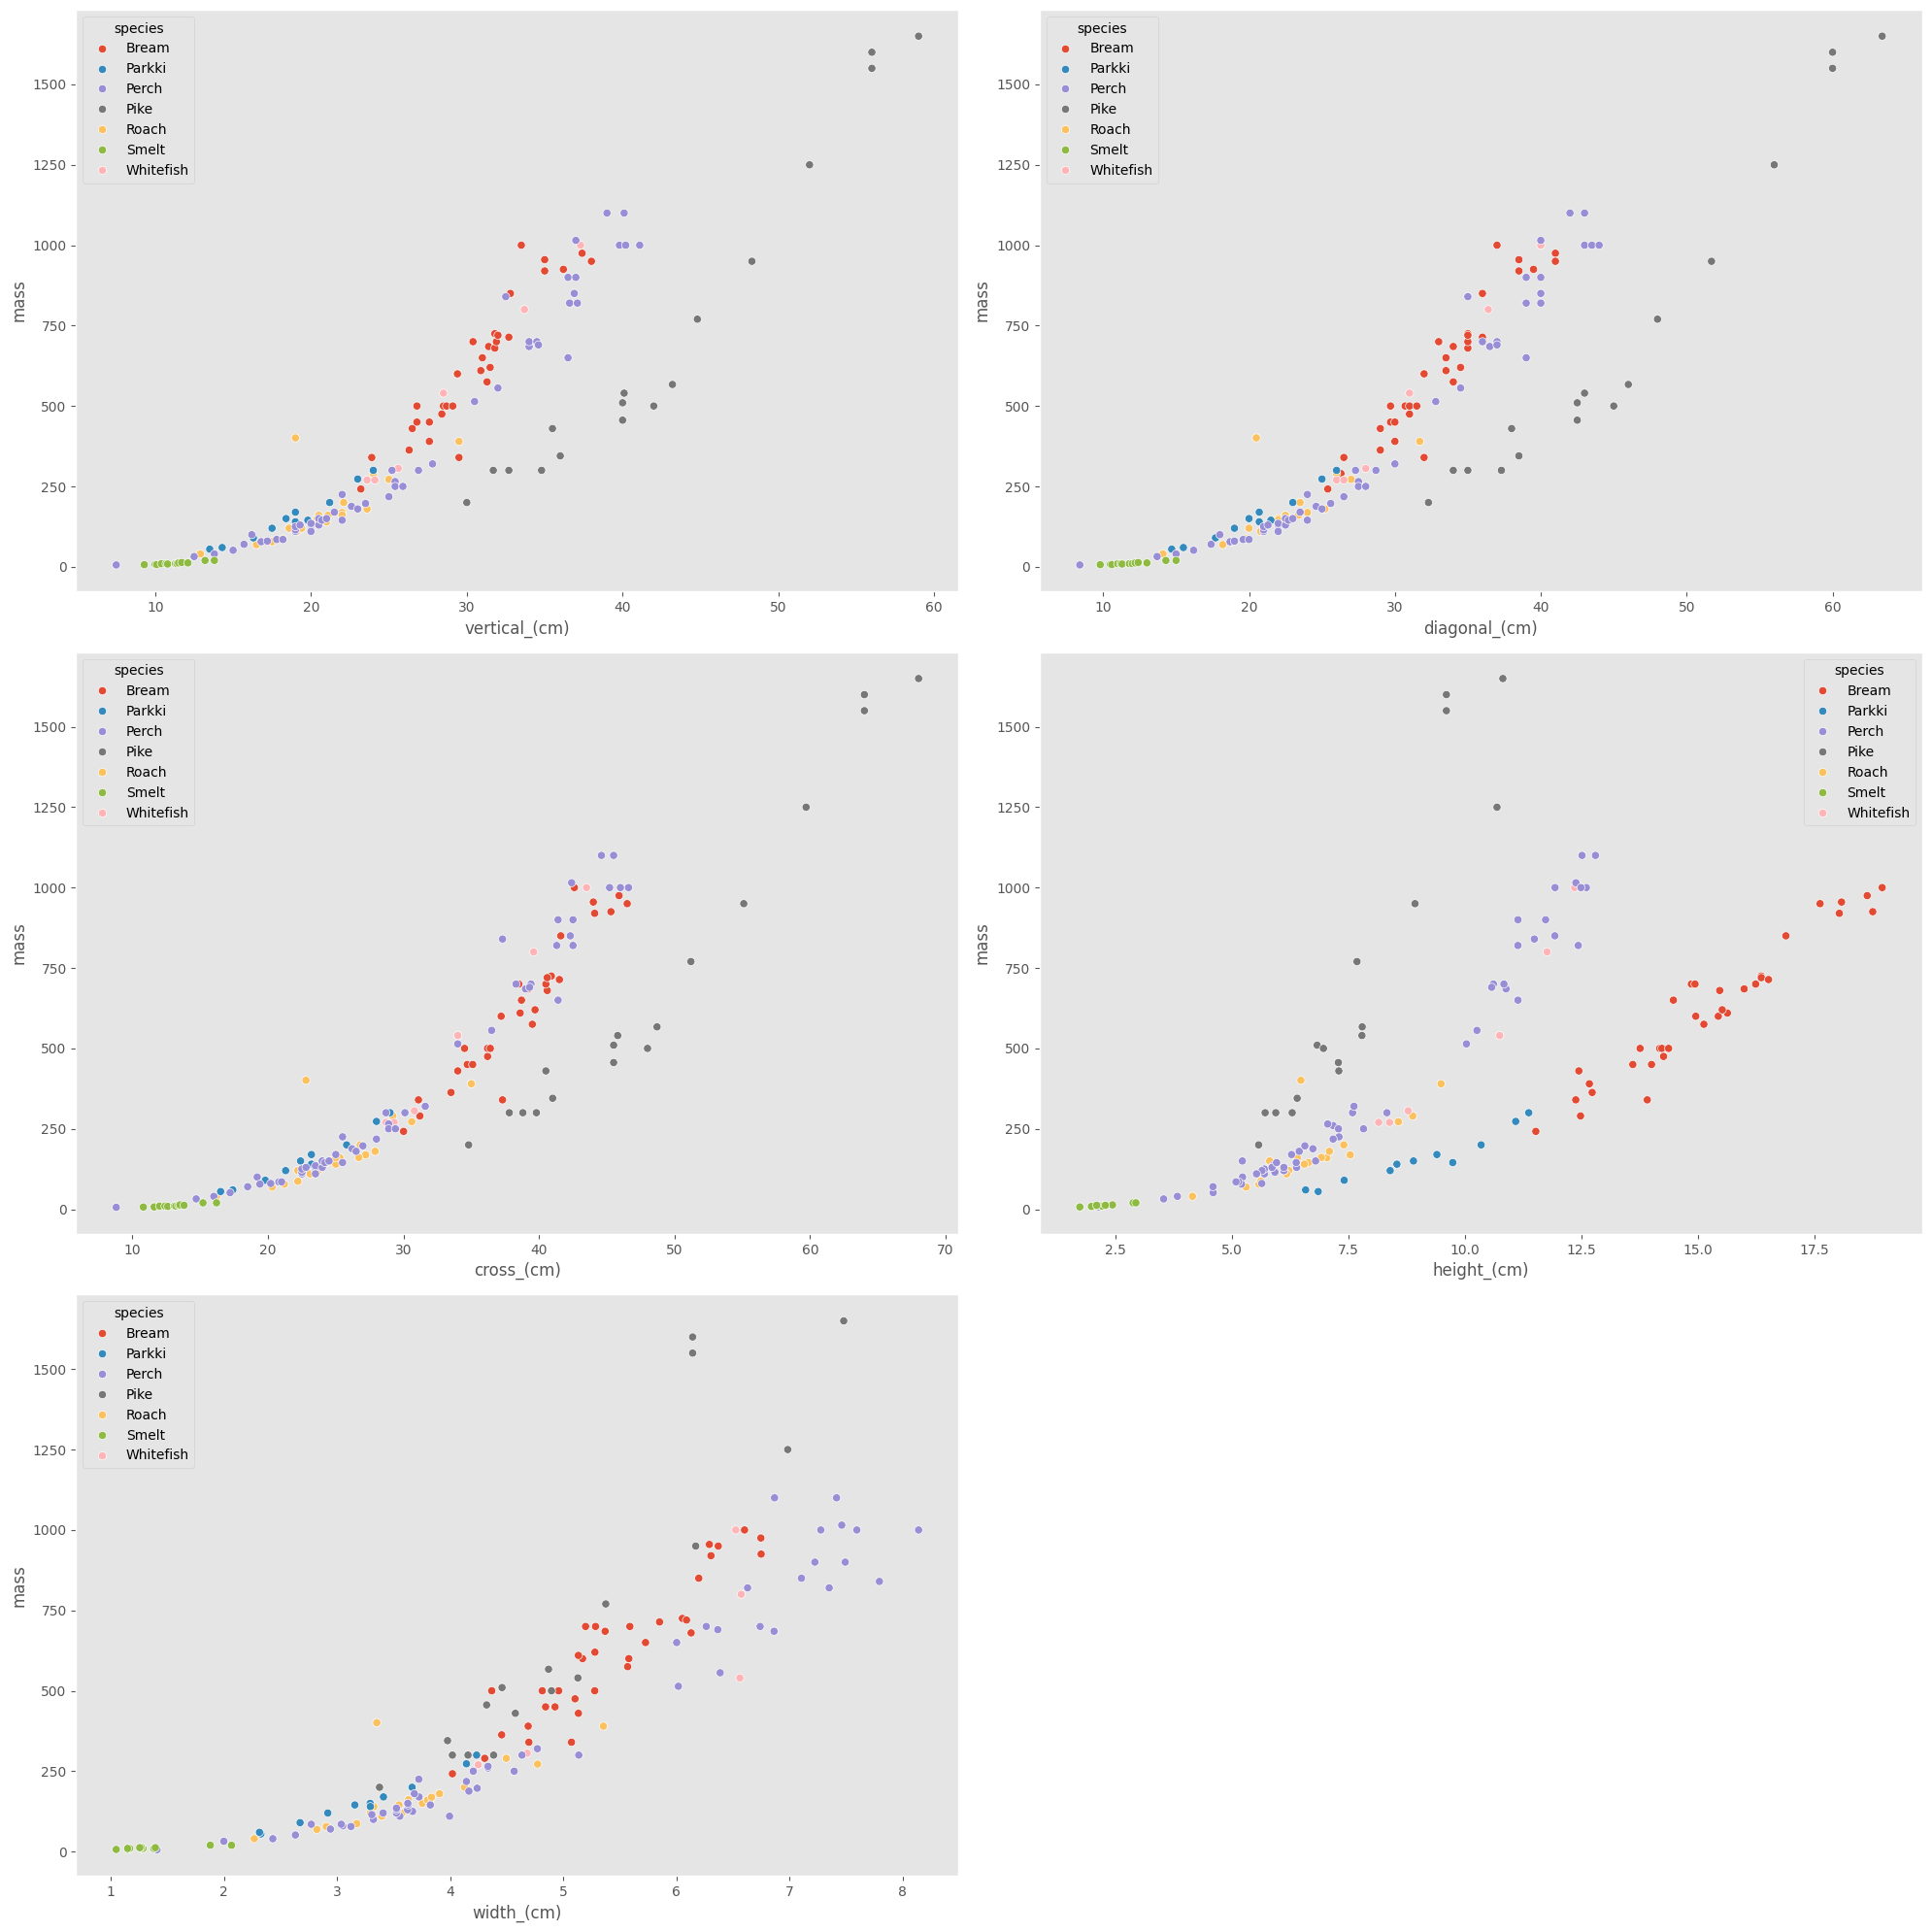

In [209]:
graph.scatter_subplots('mass', 3, 2,'species')

<div class="alert alert-block alert-info">
<b>Analysis:</b> For any measurement that increases, so does the mass of the fish.
</div>

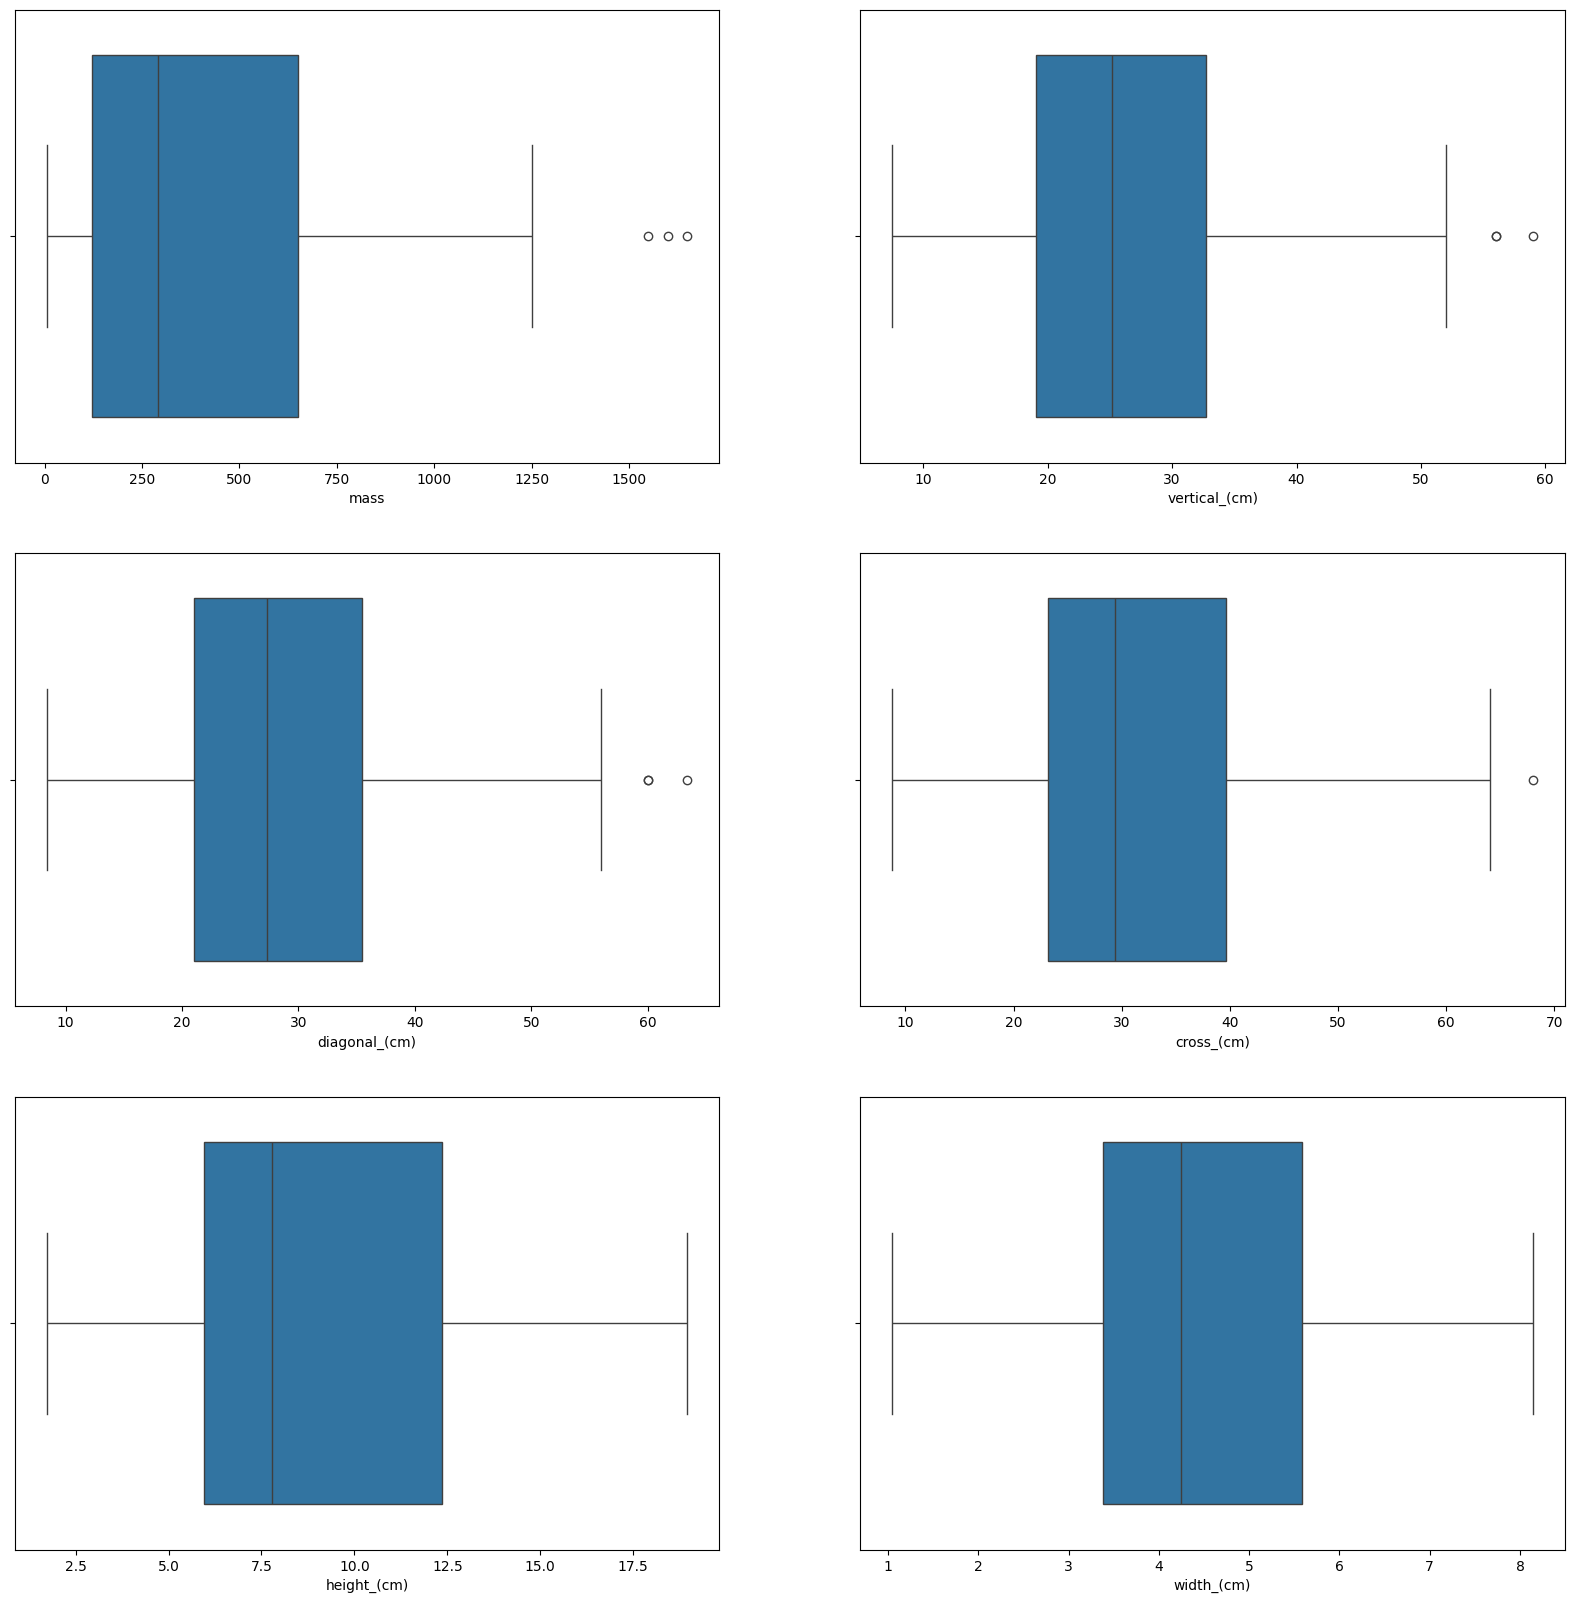

In [210]:
graph.box_subplots(3, 2)

<div class="alert alert-block alert-info">
<b>Analysis:</b> There are a few ouliers among some of the measurements, Let's identify them. We can examine if they are true data points that need to be included in dataset, or errors that need to be removed. 
</div>

In [211]:
# identify outliers by row
fish_df.show_outlier_rows()

---------------------------------------- mass ----------------------------------------
    species    mass  vertical_(cm)  diagonal_(cm)  cross_(cm)  height_(cm)  \
142    Pike  1600.0           56.0           60.0        64.0        9.600   
143    Pike  1550.0           56.0           60.0        64.0        9.600   
144    Pike  1650.0           59.0           63.4        68.0       10.812   

     width_(cm)  
142       6.144  
143       6.144  
144       7.480  
---------------------------------------- vertical_(cm) ----------------------------------------
    species    mass  vertical_(cm)  diagonal_(cm)  cross_(cm)  height_(cm)  \
142    Pike  1600.0           56.0           60.0        64.0        9.600   
143    Pike  1550.0           56.0           60.0        64.0        9.600   
144    Pike  1650.0           59.0           63.4        68.0       10.812   

     width_(cm)  
142       6.144  
143       6.144  
144       7.480  
---------------------------------------- diagon

In [212]:
fish_df.loc[142:144, :]

,species,mass,vertical_(cm),diagonal_(cm),cross_(cm),height_(cm),width_(cm)
142,Pike,1600.0,56.0,60.0,64.0,9.600,6.144
143,Pike,1550.0,56.0,60.0,64.0,9.600,6.144
144,Pike,1650.0,59.0,63.4,68.0,10.812,7.480


<div class="alert alert-block alert-info">
<b>Analysis:</b> Since all the outliers involve the Pike species, let's take a look at all the Pike fish records and see how the different measurements correspond to each other. 
</div>

In [213]:
fish_df[fish_df['species'] == 'Pike']

,species,mass,vertical_(cm),diagonal_(cm),cross_(cm),height_(cm),width_(cm)
128,Pike,200.0,30.0,32.3,34.8,5.5680,3.3756
129,Pike,300.0,31.7,34.0,37.8,5.7078,4.1580
130,Pike,300.0,32.7,35.0,38.8,5.9364,4.3844
131,Pike,300.0,34.8,37.3,39.8,6.2884,4.0198
132,Pike,430.0,35.5,38.0,40.5,7.2900,4.5765
133,Pike,345.0,36.0,38.5,41.0,6.3960,3.9770
134,Pike,456.0,40.0,42.5,45.5,7.2800,4.3225
135,Pike,510.0,40.0,42.5,45.5,6.8250,4.4590
136,Pike,540.0,40.1,43.0,45.8,7.7860,5.1296
137,Pike,500.0,42.0,45.0,48.0,6.9600,4.8960


<div class="alert alert-block alert-info">
<b>Analysis:</b> When examining "Pike" fish, mass increases as corresponding measurements increase. This trend is observed in the outliers also. We can conclude that the outliers are valid entries and do not need to be removed. 
</div>

<Axes: >

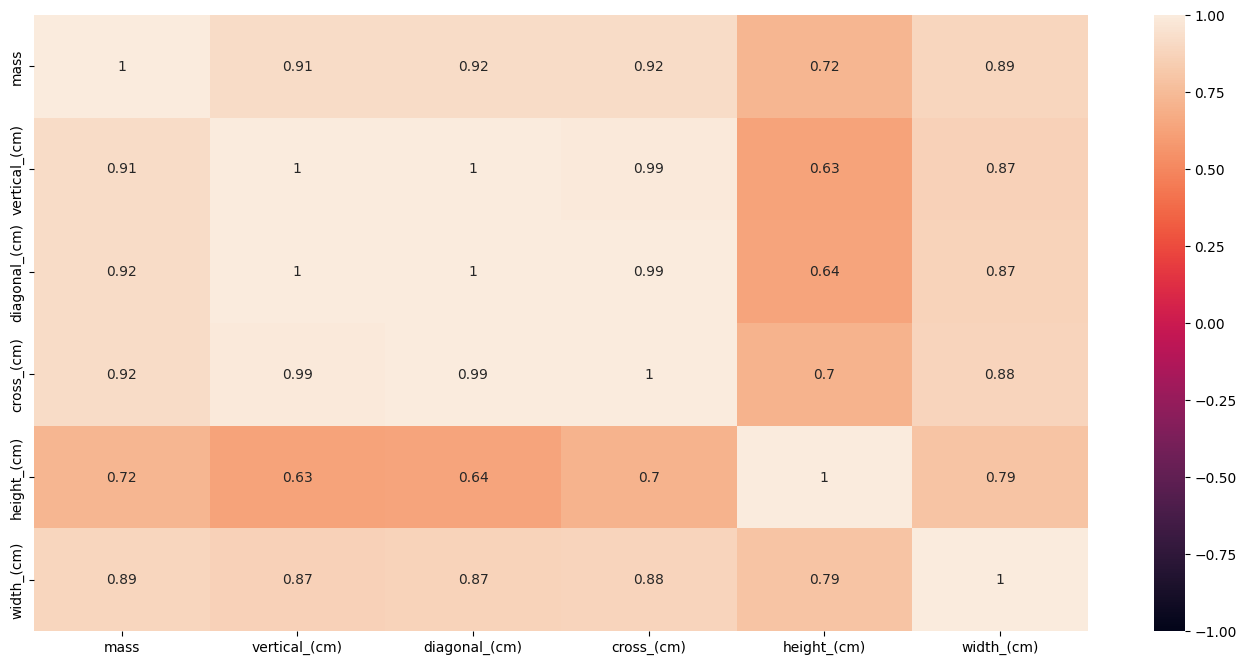

In [214]:
corr = fish_df.corr(numeric_only=True)
plt.figure(figsize=(17,8))
sns.heatmap(data=corr, vmin=-1, annot=True)

<div class="alert alert-block alert-info">
<b>Analysis:</b> Multivariable graph of correlations between attributes. 
</div>

<br><h1><center><em>Prepare Data and Train Data with Regression models</em></center></h1><br>

In [215]:
# Hot encode the species column
reg_df = pd.get_dummies(fish_df, columns=['species'], drop_first=True)

In [217]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline

# 2. Flexible custom transformer
class Fish_Transformer(BaseEstimator, TransformerMixin):
    def __init__(self, target_column=None):
        self.target_column = target_column

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        if self.target_column is not None and self.target_column in X.columns:
            return X.drop([self.target_column], axis=1)
        return X

In [218]:
# import regression models and metrics
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.metrics import root_mean_squared_error

In [220]:
# initialize models to a list
regs = [LinearRegression(),
        GradientBoostingRegressor(max_depth=2, n_estimators=50, learning_rate=0.1, random_state=42),
        RandomForestRegressor(min_samples_split=4, max_depth=4, n_estimators=100, random_state=42),
        DecisionTreeRegressor(splitter='best', max_depth=4, min_samples_split=4, random_state=42)]

In [ ]:
# create a function to train all regression models and plot the actual vs predicted values for a certian measurement
def models(column):
    # Dynamic train-test split
    X = reg_df.drop(columns=[column])
    y = reg_df[column]
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.20, random_state=42
    )

    fig = plt.figure(figsize=(20, 20))
    k = 1
    for x in regs:
        pipe = Pipeline([
            ('transformer', Fish_Transformer(target_column=column)),
            ('scaler', MinMaxScaler()),
            ('reg', x)
        ])
        pipe.fit(X_train, y_train)
        regressor = pipe['reg'].__class__.__name__

        print('-'*20, regressor, '-'*20, end='\n\n')
        score = pipe.score(X_train, y_train)
        y_pred = pipe.predict(X_test)
        rs = r2_score(y_test, y_pred)
        n = X_test.shape[0]
        p = X_test.shape[1]
        adj_rs = 1 - (1 - rs) * (n - 1) / (n - p - 1)
        rmse = root_mean_squared_error(y_test, y_pred)
        print(f"The R-Squared value for {regressor} is: {rs:.4f}")
        print(f"The Adj R-Squared value for {regressor} is: {adj_rs:.4f}")
        print(f"The RMSE value for {regressor} is: {rmse:.4f}")
        print(f"The score for {regressor} is: {score*100:.2f}%", end='\n\n')

        # Plot the actual vs predicted values
        with plt.style.context('ggplot'):
            plt.subplot(2, 2, k)
            plt.scatter(y_test, y_test, color='crimson', alpha=0.4, label='Actual')
            plt.scatter(y_test, y_pred, color='navy', alpha=0.4, label='Predicted')
            plt.xlabel(f"{column.title()} (Actual)")
            plt.ylabel(f"{column.title()} (Predicted)")
            plt.title(f"{regressor} Model for {column.title()} Estimation")
            plt.legend()
            plt.grid(False)
            k += 1
    plt.tight_layout()
    plt.show()

-------------------- LinearRegression --------------------

The R-Squared value for LinearRegression is: 0.9512
The Adj R-Squared value for LinearRegression is: 0.9243
The RMSE value for LinearRegression is: 83.3470
The score for LinearRegression is: 92.18%

-------------------- GradientBoostingRegressor --------------------

The R-Squared value for GradientBoostingRegressor is: 0.9774
The Adj R-Squared value for GradientBoostingRegressor is: 0.9650
The RMSE value for GradientBoostingRegressor is: 56.6654
The score for GradientBoostingRegressor is: 99.14%

-------------------- RandomForestRegressor --------------------

The R-Squared value for RandomForestRegressor is: 0.9642
The Adj R-Squared value for RandomForestRegressor is: 0.9445
The RMSE value for RandomForestRegressor is: 71.3972
The score for RandomForestRegressor is: 98.71%

-------------------- DecisionTreeRegressor --------------------

The R-Squared value for DecisionTreeRegressor is: 0.9456
The Adj R-Squared value for Dec

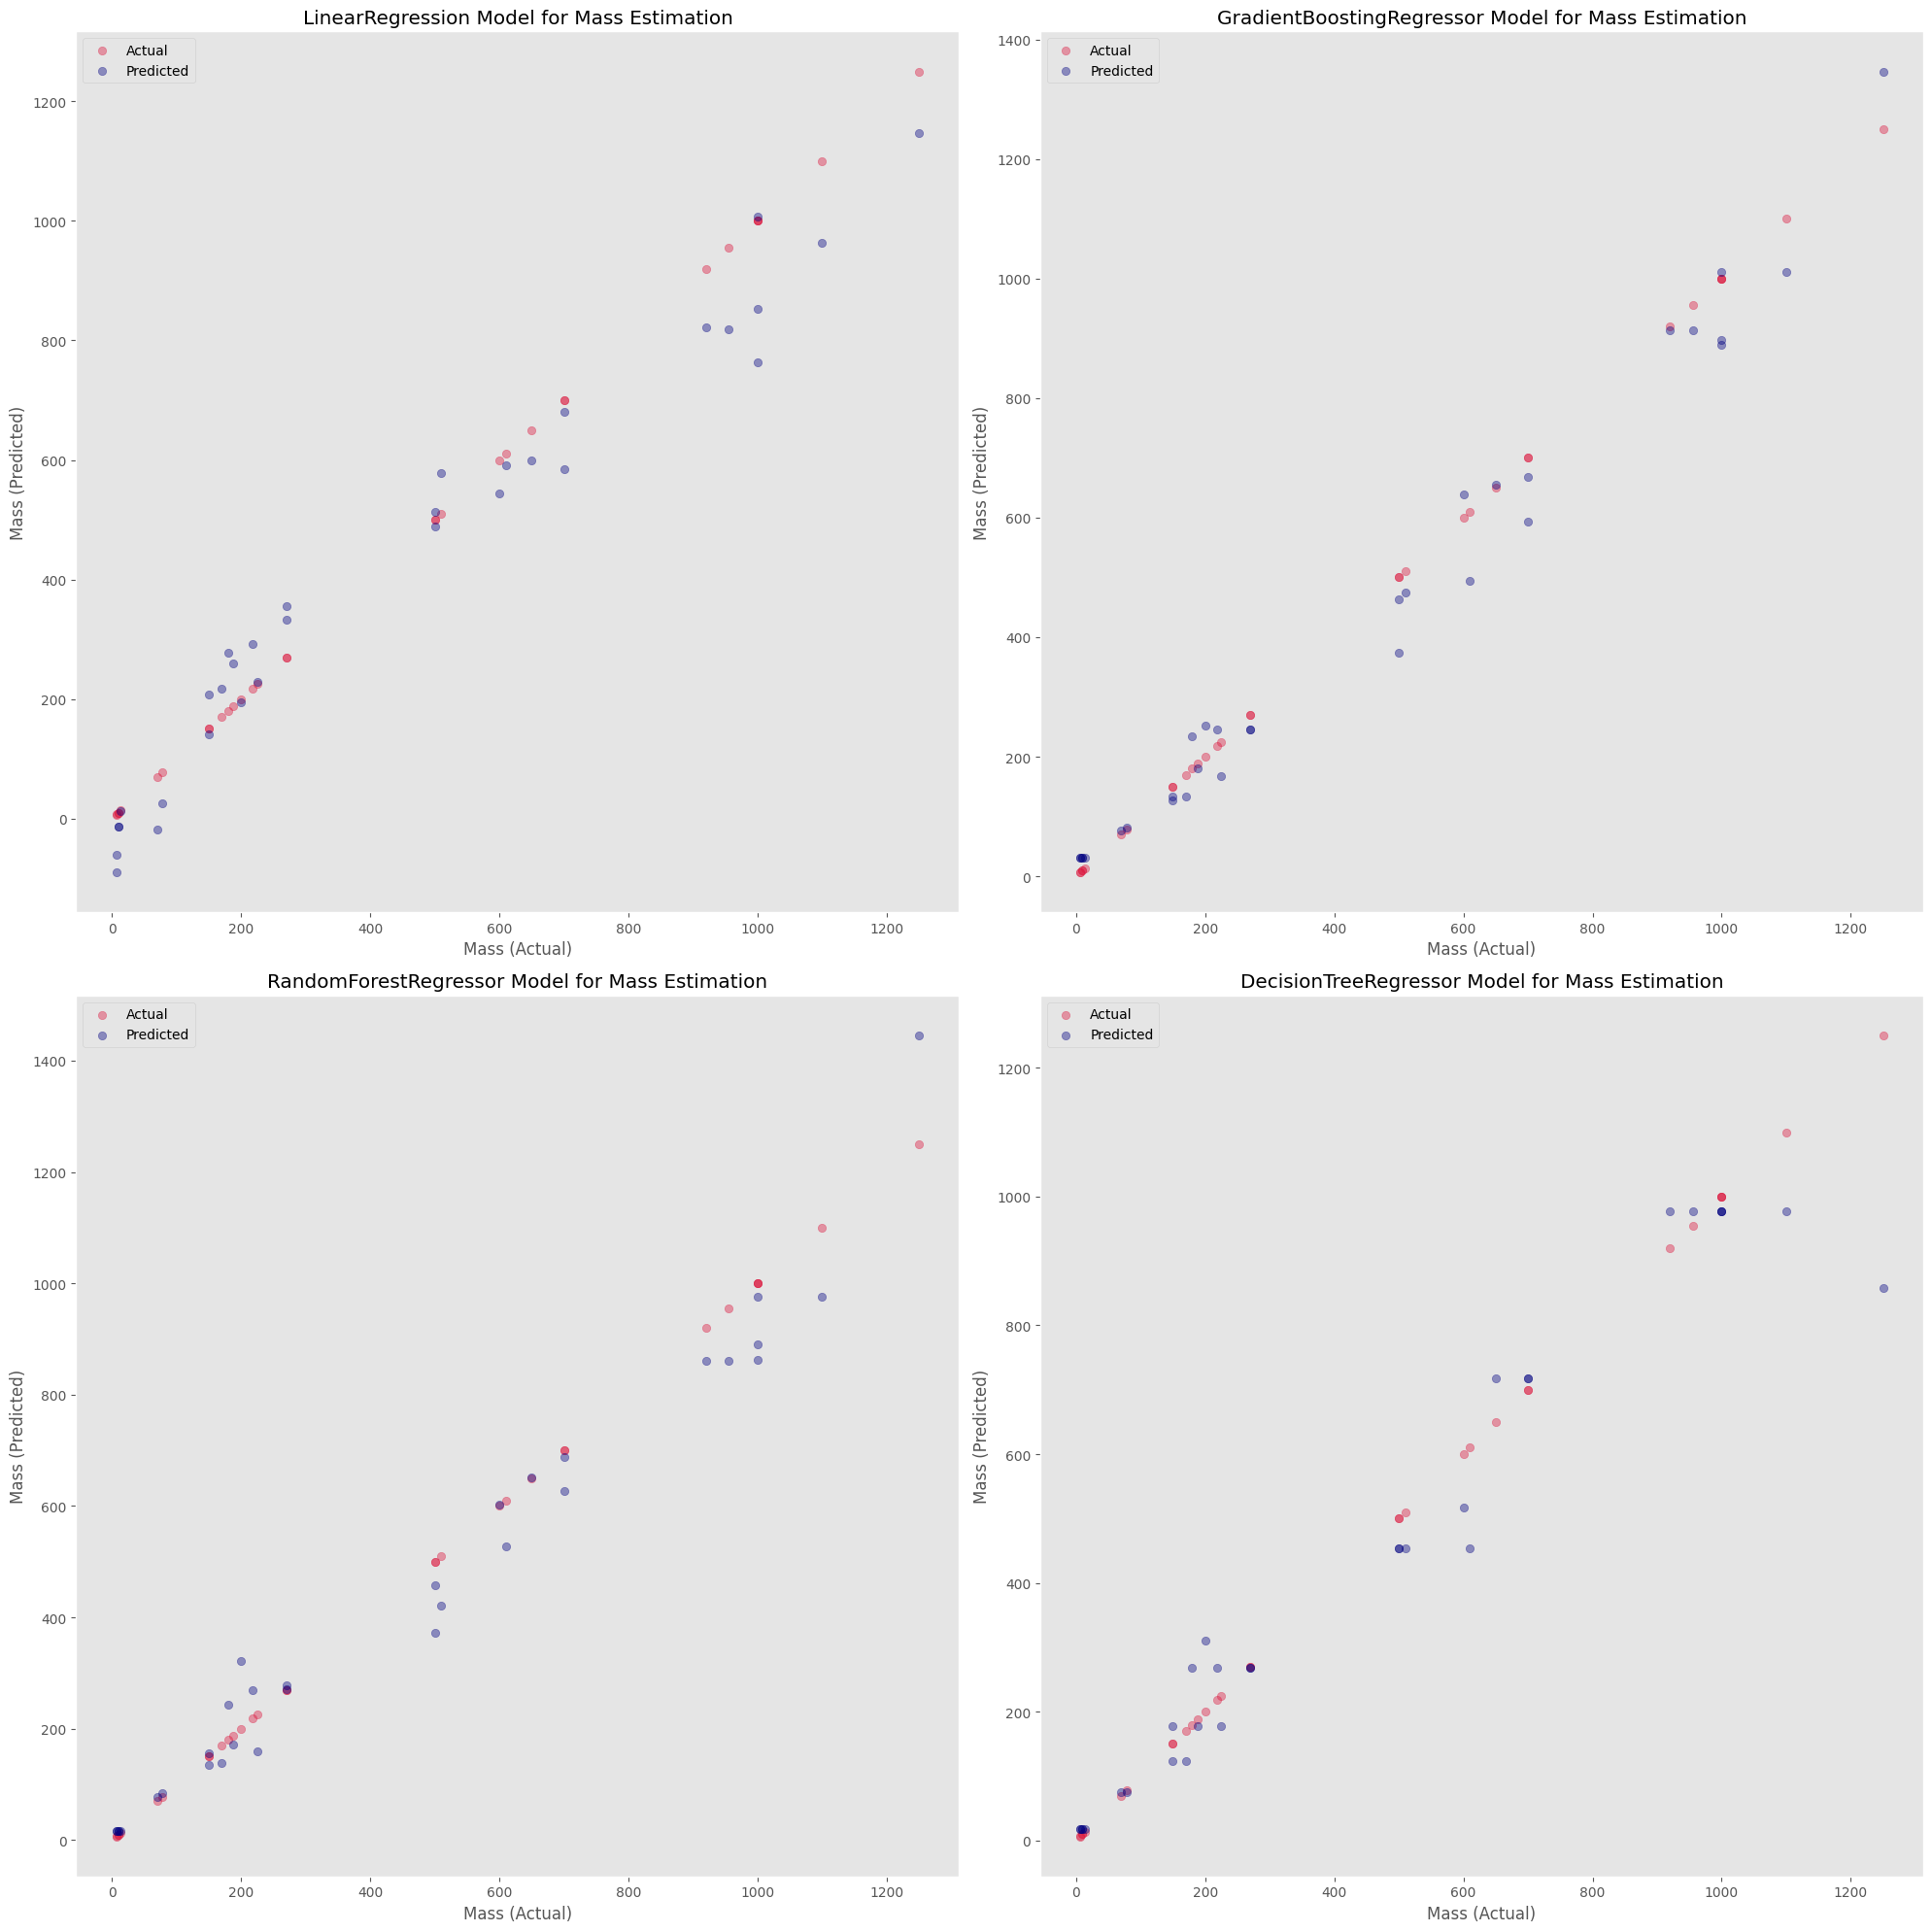

In [223]:
models("mass")

<div class="alert alert-block alert-info">
<b>Analysis:</b> The regression results show that all four models: Linear Regression, Gradient Boosting, Random Forest, and Decision Tree performed well in estimating the mass of fish, with R-squared values scoring above 0.94. This indicates that the models explain a high proportion of variance in the target variable. Among the models, the Gradient Boosting Regressor achieved the highest R-squared value (0.9774) and the lowest RMSE value (56.67), suggesting it provides the most accurate predictions for fish mass in this dataset. The relatively low RMSE values across all models also indicate that the predicted masses are generally close to the actual values. Overall, ensemble methods (Gradient Boosting and Random Forest) performed slightly better than the single-model approaches, likely due to their ability to capture more complex patterns in the data.
</div>

-------------------- LinearRegression --------------------

The R-Squared value for LinearRegression is: 0.9993
The Adj R-Squared value for LinearRegression is: 0.9990
The RMSE value for LinearRegression is: 0.2610
The score for LinearRegression is: 99.96%

-------------------- GradientBoostingRegressor --------------------

The R-Squared value for GradientBoostingRegressor is: 0.9970
The Adj R-Squared value for GradientBoostingRegressor is: 0.9953
The RMSE value for GradientBoostingRegressor is: 0.5558
The score for GradientBoostingRegressor is: 99.95%

-------------------- RandomForestRegressor --------------------

The R-Squared value for RandomForestRegressor is: 0.9941
The Adj R-Squared value for RandomForestRegressor is: 0.9909
The RMSE value for RandomForestRegressor is: 0.7737
The score for RandomForestRegressor is: 99.75%

-------------------- DecisionTreeRegressor --------------------

The R-Squared value for DecisionTreeRegressor is: 0.9827
The Adj R-Squared value for Decisi

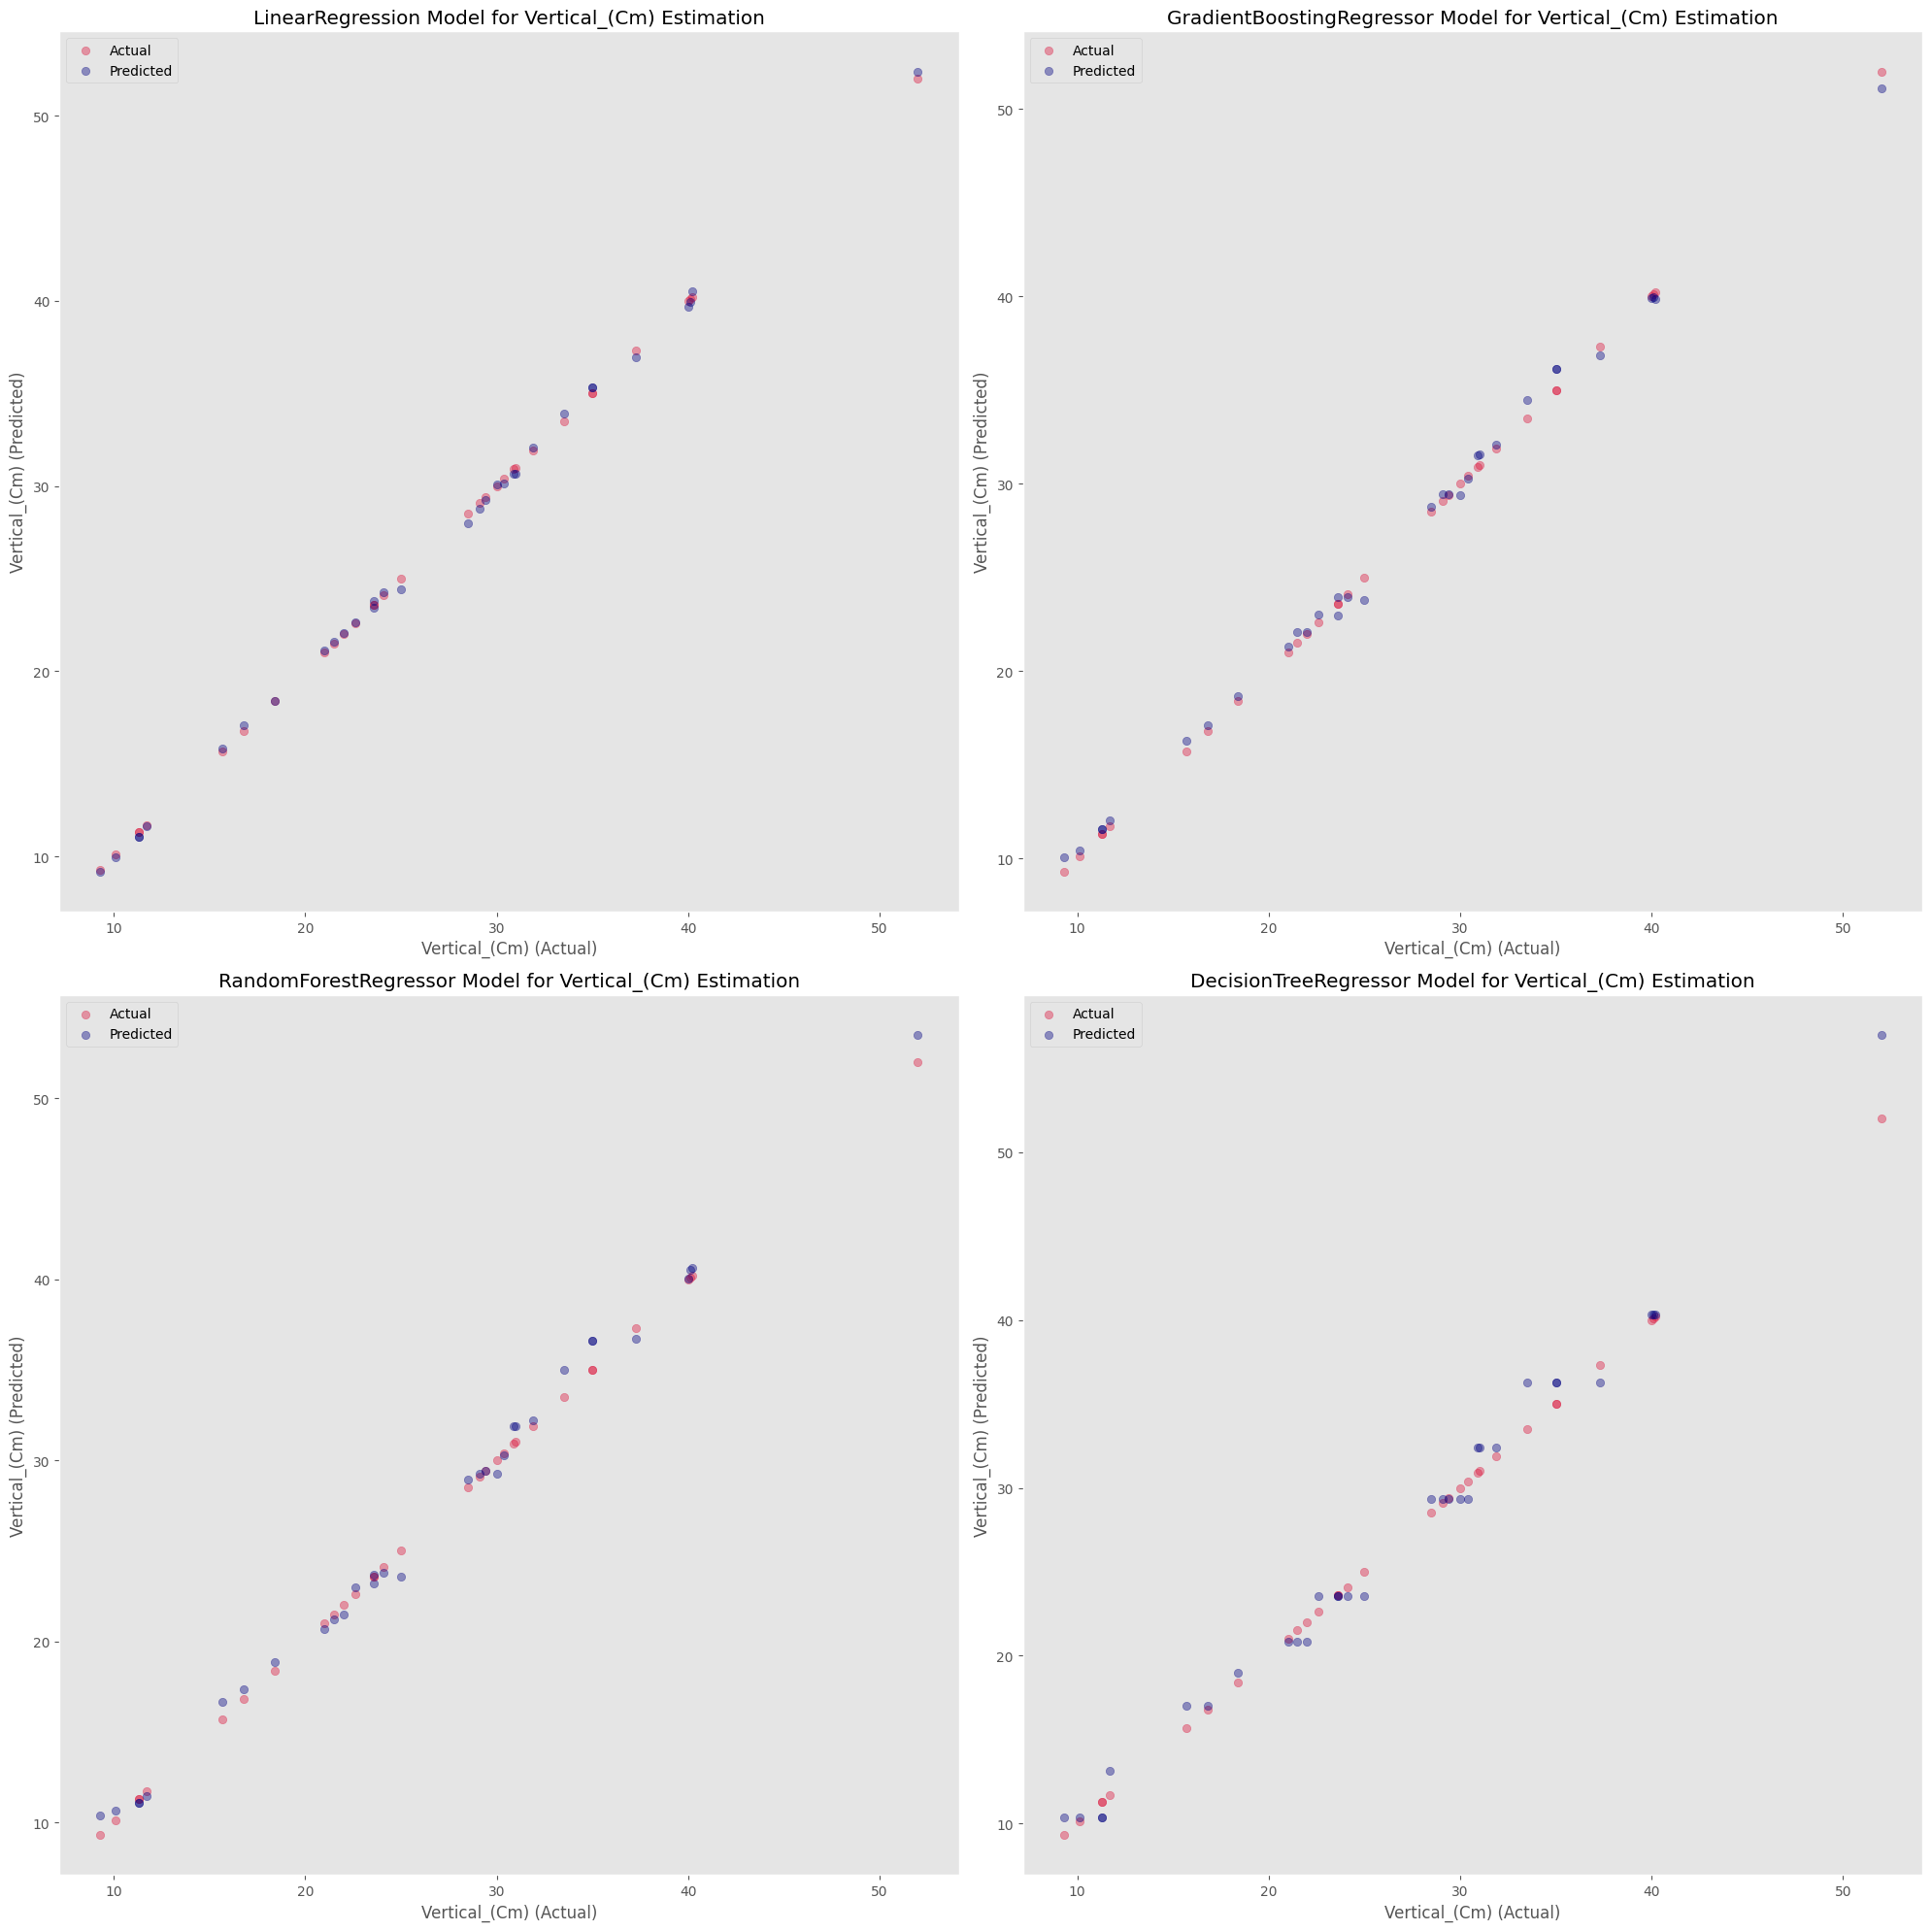

In [224]:
models('vertical_(cm)')

<div class="alert alert-block alert-info">
<b>Analysis:</b> All models performed extremely well, with R-squared values above 0.98 for every regressor, indicating nearly perfect fits. The Linear Regression model achieved the highest R-squared (0.9993), lowest RMSE (0.2610), and highest score (99.96%), showing exceptional accuracy for this target. Both ensemble methods, Gradient Boosting (R² = 0.9970, RMSE = 0.5558, score = 99.95%) and Random Forest (R² = 0.9941, RMSE = 0.7737, score = 99.75%), also produced highly accurate results. Even the Decision Tree model performed strongly (R² = 0.9827, RMSE = 1.3280, score = 99.21%). Overall, the results indicate that the vertical measurement of fish is highly predictable from the available features, with all regressors achieving excellent performance and Linear Regression yielding the best results on this task.
</div>

-------------------- LinearRegression --------------------

The R-Squared value for LinearRegression is: 0.9997
The Adj R-Squared value for LinearRegression is: 0.9995
The RMSE value for LinearRegression is: 0.1923
The score for LinearRegression is: 99.98%

-------------------- GradientBoostingRegressor --------------------

The R-Squared value for GradientBoostingRegressor is: 0.9969
The Adj R-Squared value for GradientBoostingRegressor is: 0.9952
The RMSE value for GradientBoostingRegressor is: 0.6073
The score for GradientBoostingRegressor is: 99.96%

-------------------- RandomForestRegressor --------------------

The R-Squared value for RandomForestRegressor is: 0.9969
The Adj R-Squared value for RandomForestRegressor is: 0.9952
The RMSE value for RandomForestRegressor is: 0.6124
The score for RandomForestRegressor is: 99.76%

-------------------- DecisionTreeRegressor --------------------

The R-Squared value for DecisionTreeRegressor is: 0.9809
The Adj R-Squared value for Decisi

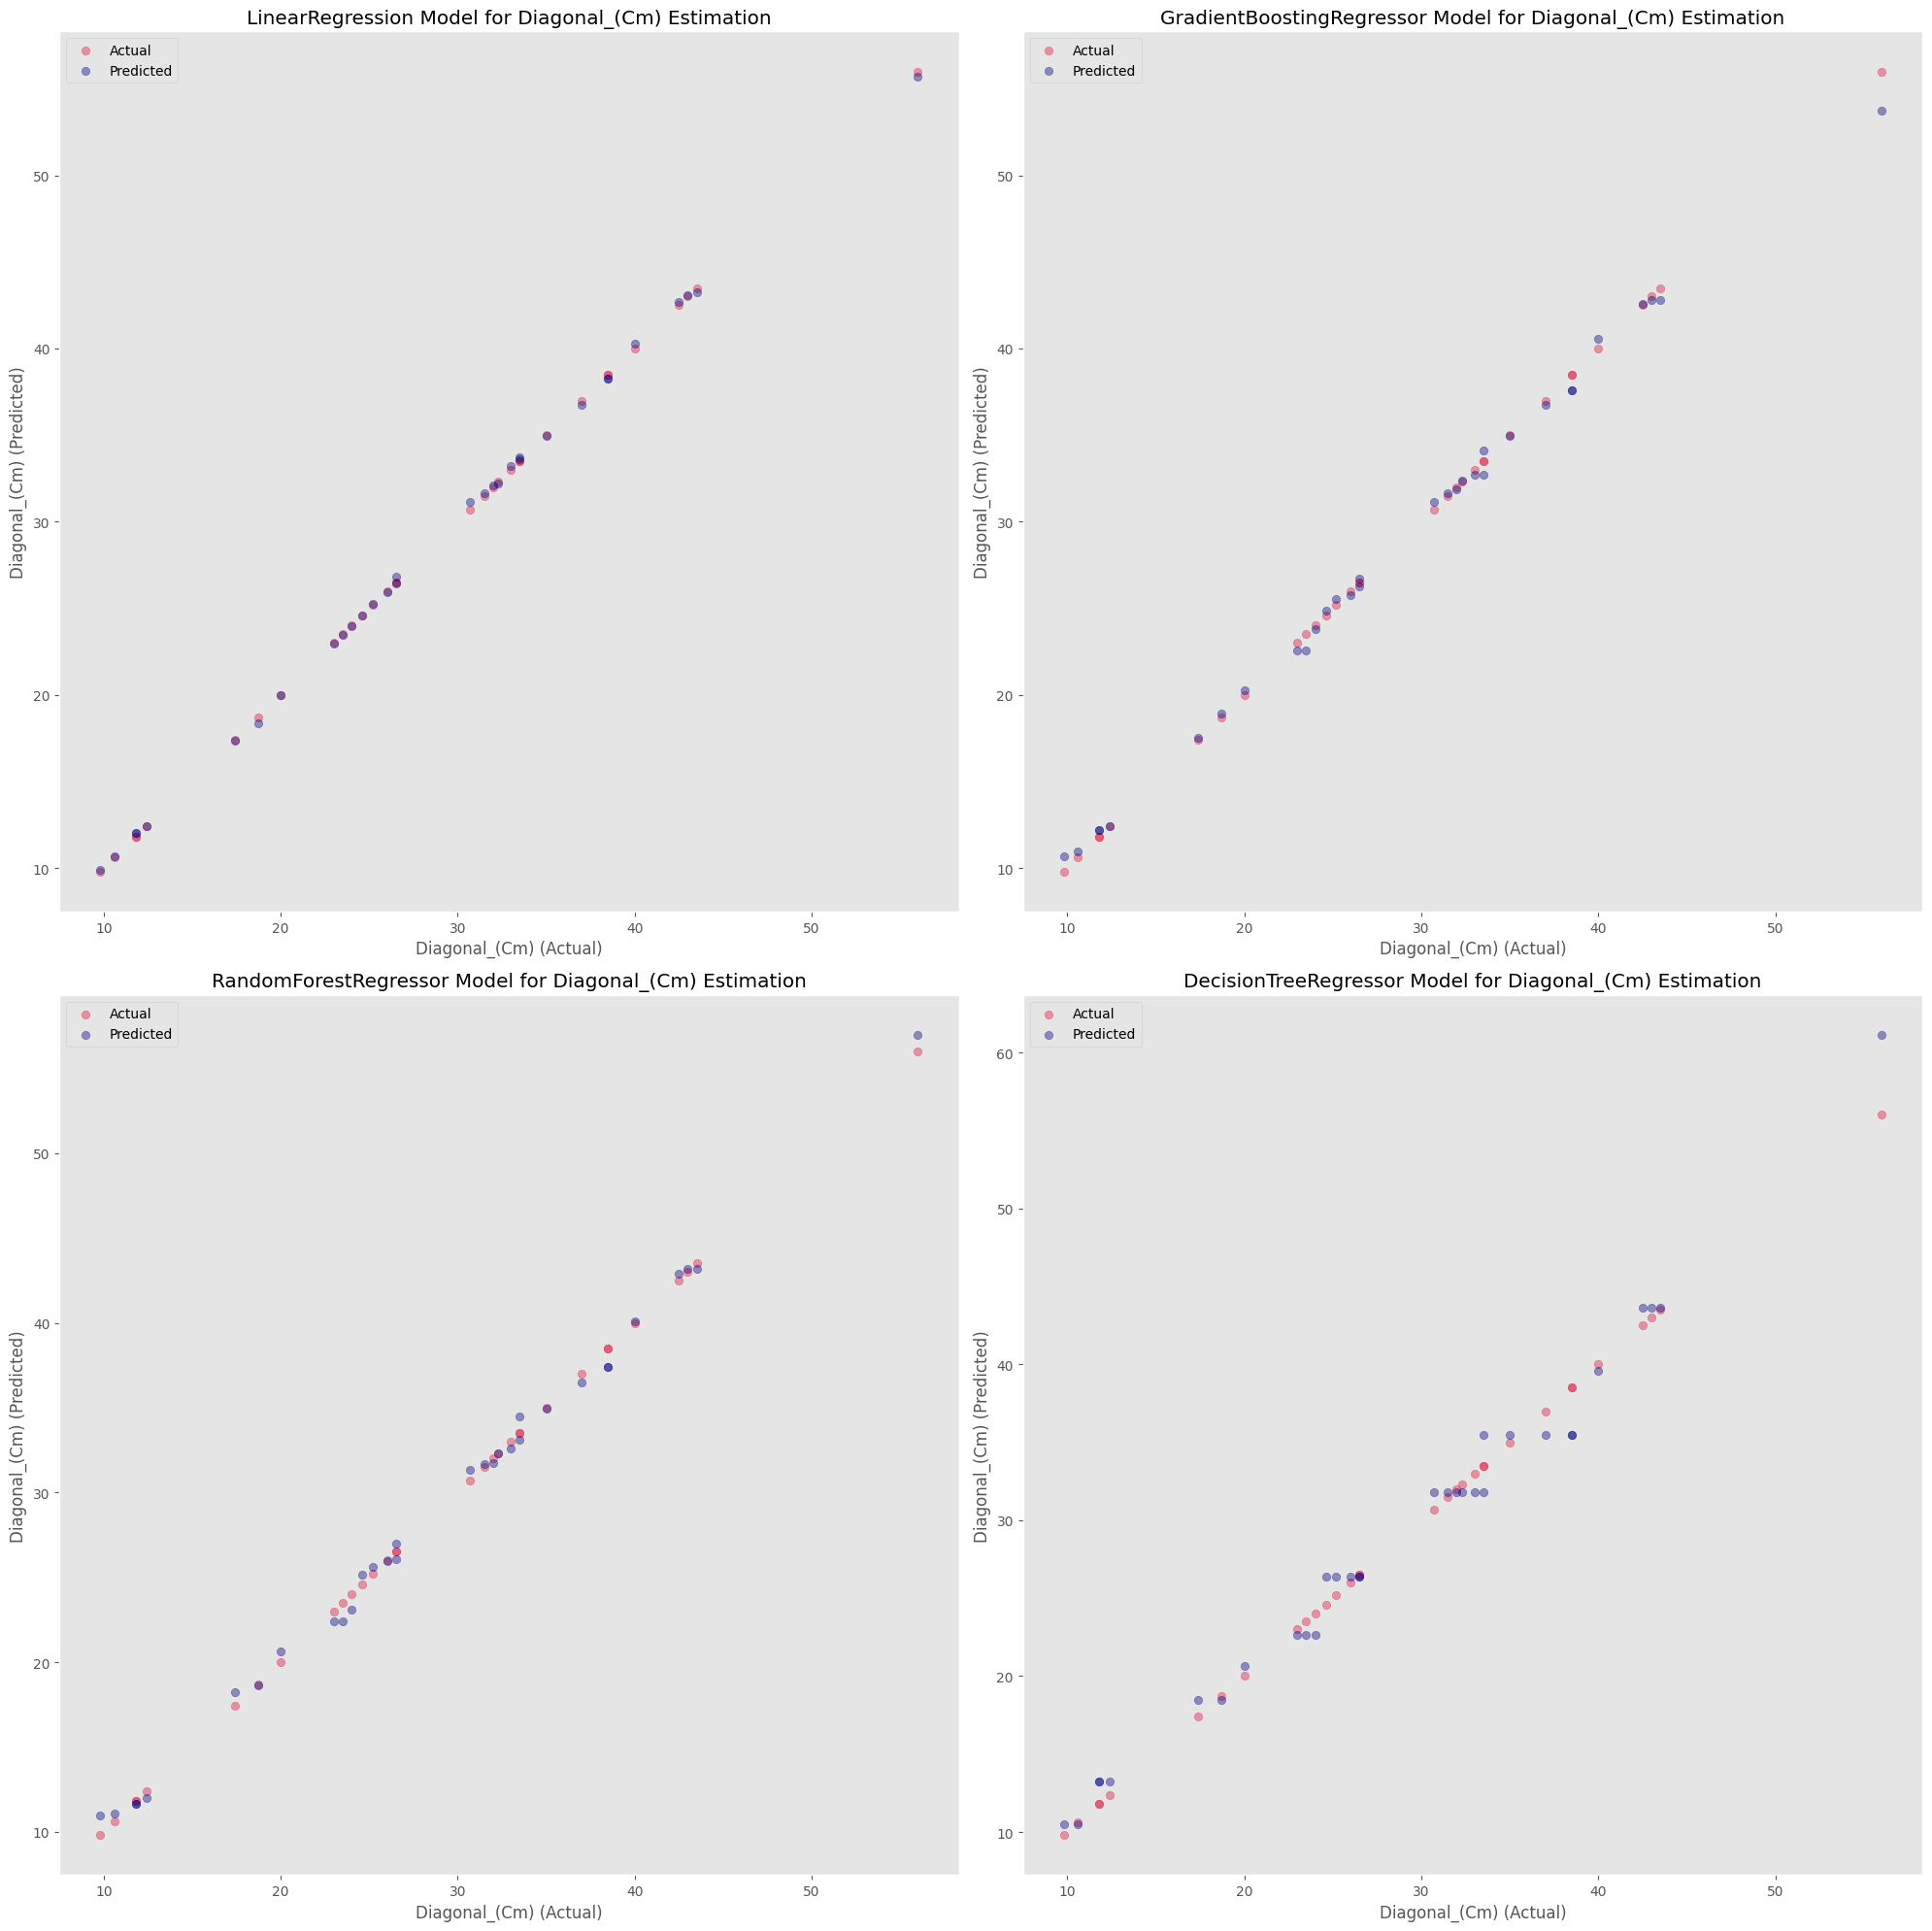

In [225]:
models('diagonal_(cm)')

<div class="alert alert-block alert-info">
<b>Analysis:</b> For the prediction of the fish diagonal measurement (diagonal_(cm)), all regression models achieved very high performance scores, with R-squared values above 0.98. Linear Regression led the pack with an R-squared of 0.9997, an exceptionally low RMSE of 0.1923, and a score of 99.98%, indicating almost perfect predictive accuracy. Both Gradient Boosting and Random Forest regressors performed nearly as well (R² ≈ 0.9969, RMSE ≈ 0.61), while Decision Tree also produced strong results (R² = 0.9809, RMSE = 1.5127, score = 99.28%). These results confirm that the diagonal measurement of fish is highly predictable from the available features, and all the tested regressors are capable of modeling this target with remarkable precision.
</div>

-------------------- LinearRegression --------------------

The R-Squared value for LinearRegression is: 0.9998
The Adj R-Squared value for LinearRegression is: 0.9997
The RMSE value for LinearRegression is: 0.1700
The score for LinearRegression is: 99.94%

-------------------- GradientBoostingRegressor --------------------

The R-Squared value for GradientBoostingRegressor is: 0.9926
The Adj R-Squared value for GradientBoostingRegressor is: 0.9885
The RMSE value for GradientBoostingRegressor is: 1.0450
The score for GradientBoostingRegressor is: 99.79%

-------------------- RandomForestRegressor --------------------

The R-Squared value for RandomForestRegressor is: 0.9892
The Adj R-Squared value for RandomForestRegressor is: 0.9833
The RMSE value for RandomForestRegressor is: 1.2609
The score for RandomForestRegressor is: 99.34%

-------------------- DecisionTreeRegressor --------------------

The R-Squared value for DecisionTreeRegressor is: 0.9775
The Adj R-Squared value for Decisi

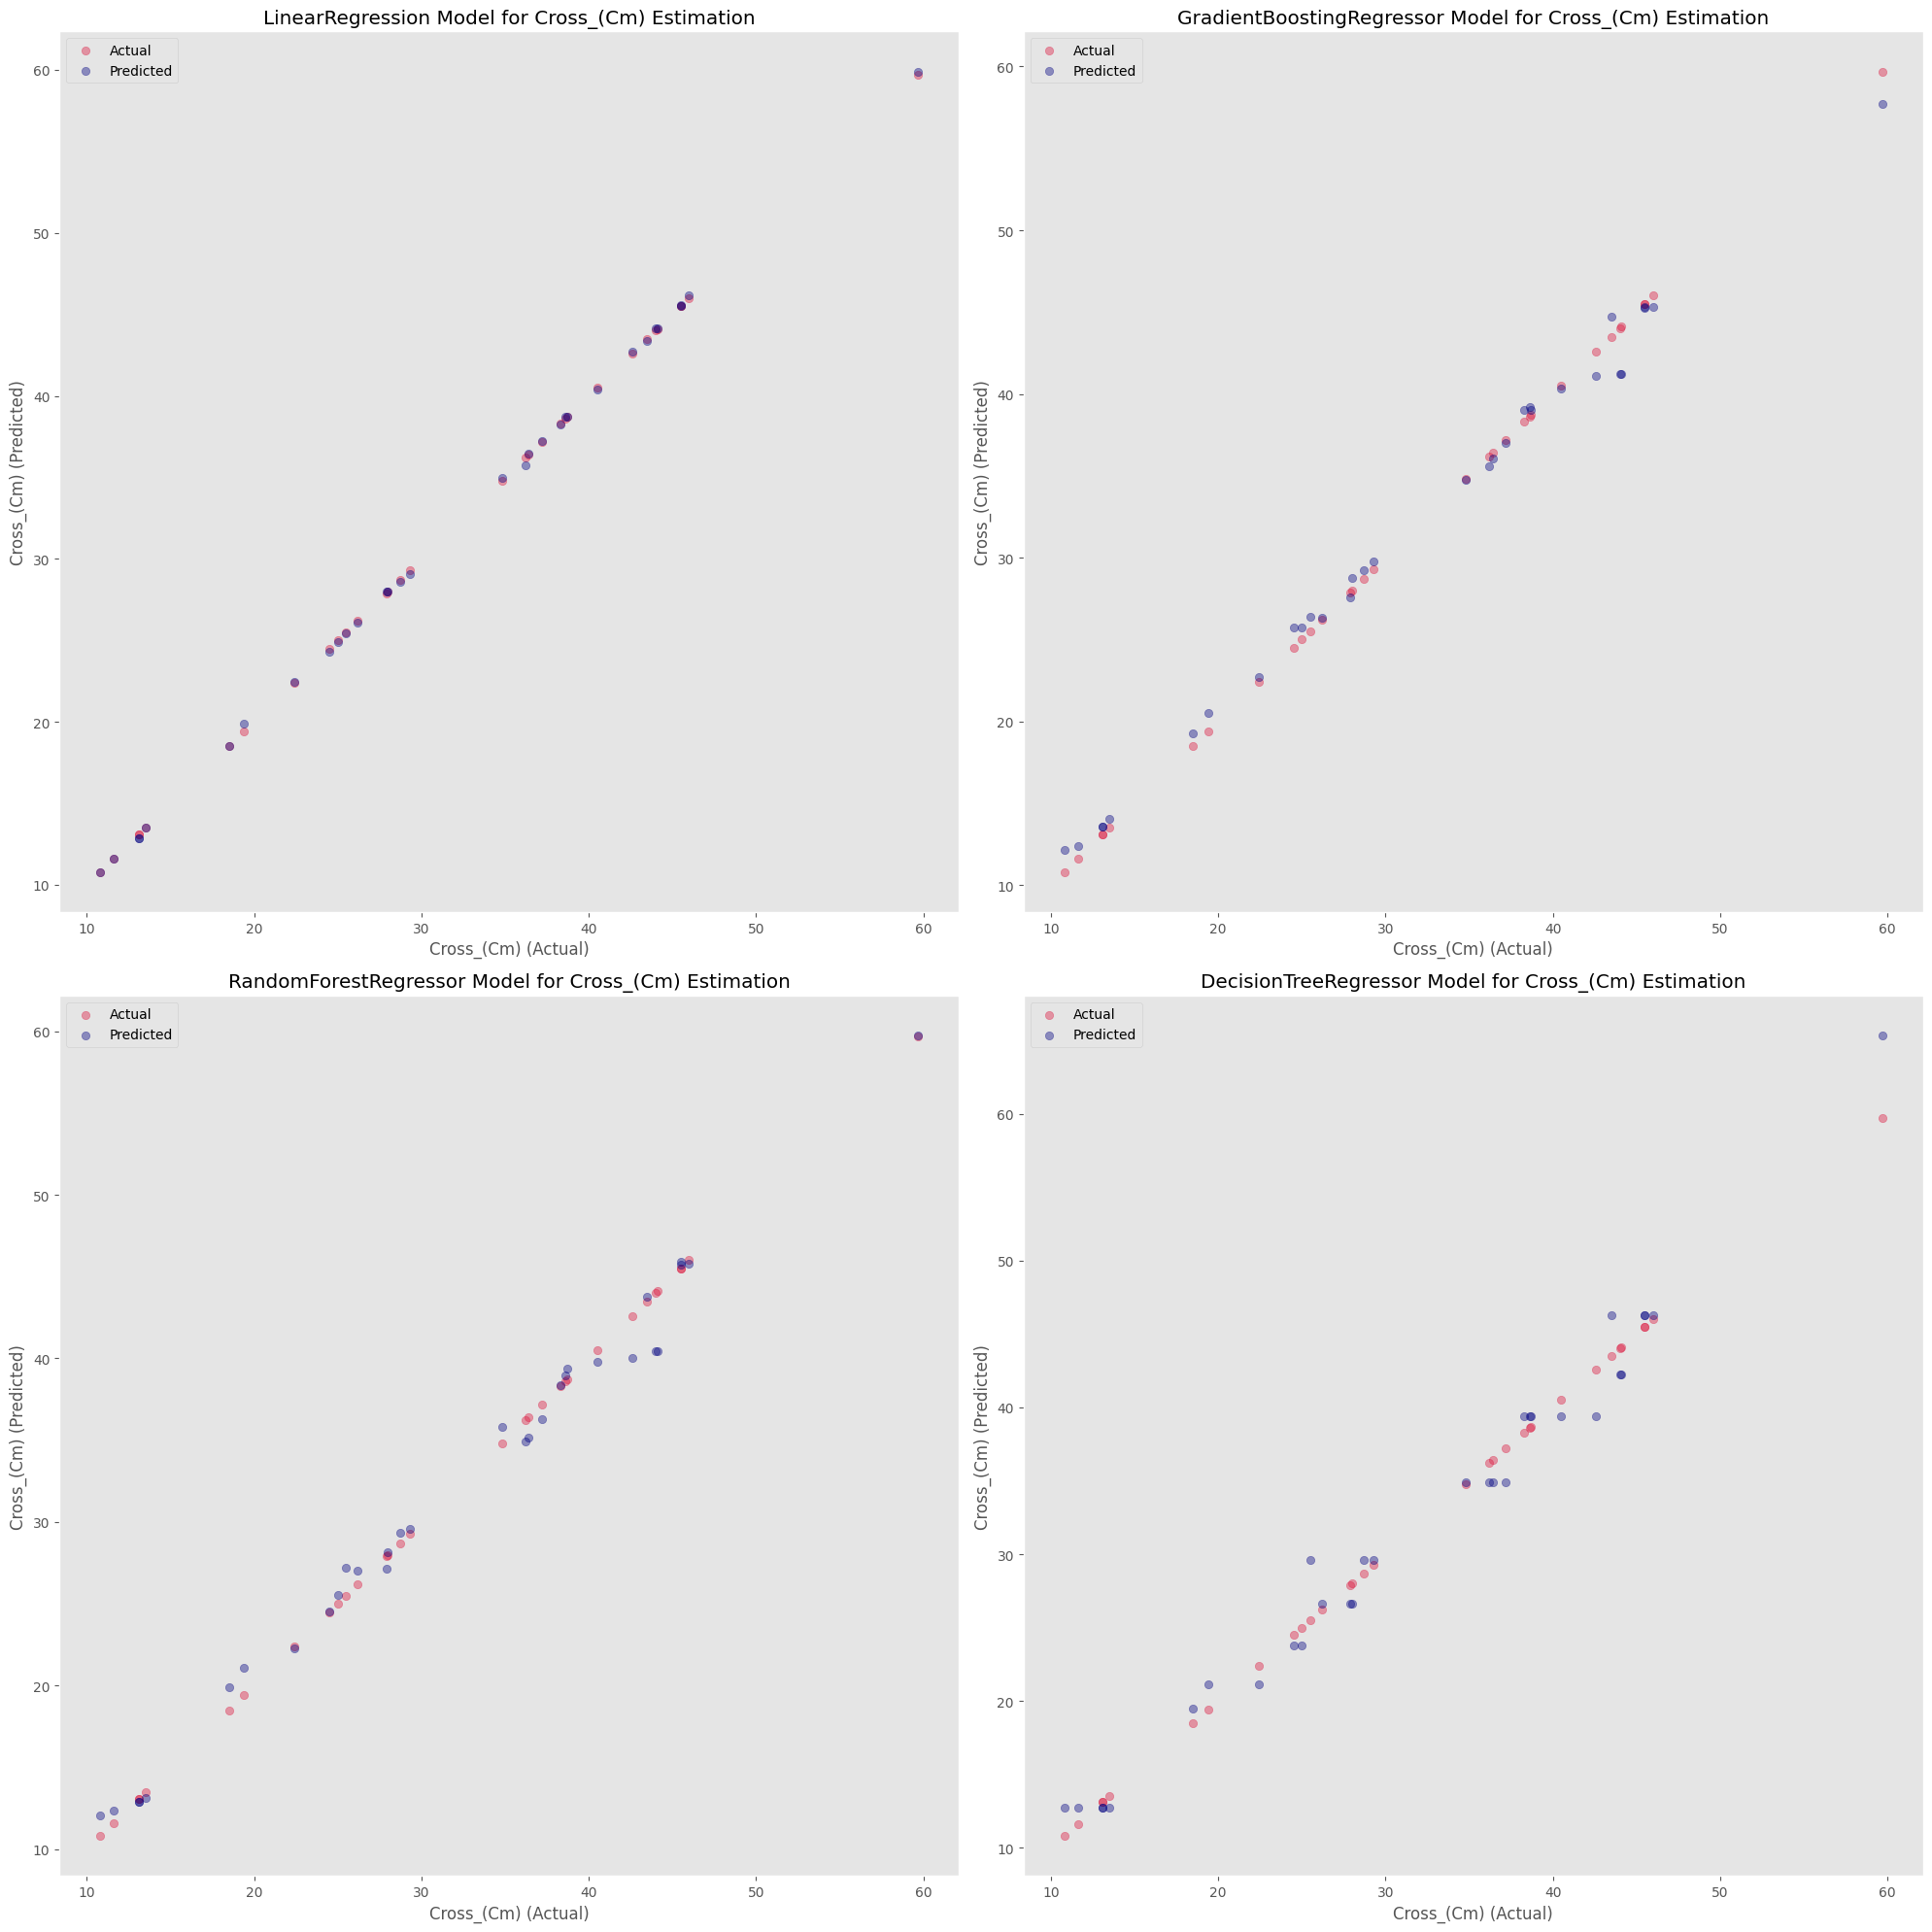

In [226]:
models('cross_(cm)')

<div class="alert alert-block alert-info">
<b>Analysis:</b> For the prediction of fish cross measurement (cross_(cm)), all regressors demonstrated excellent performance with R-squared values above 0.97, indicating a strong ability to explain the variation in the target variable. Linear Regression achieved the highest accuracy, with an R-squared of 0.9998, a very low RMSE of 0.1700, and a score of 99.94%, indicating near-perfect predictions. Both Gradient Boosting (R² = 0.9926, RMSE = 1.0450, score = 99.79%) and Random Forest (R² = 0.9892, RMSE = 1.2609, score = 99.34%) also performed exceptionally well, while the Decision Tree model, though slightly lower, still achieved strong results (R² = 0.9775, RMSE = 1.8211, score = 99.05%). Overall, these results show that the cross-sectional measurement of fish can be predicted with high precision using a variety of regression techniques, with Linear Regression delivering the best performance on this target.
</div>

-------------------- LinearRegression --------------------

The R-Squared value for LinearRegression is: 0.9807
The Adj R-Squared value for LinearRegression is: 0.9701
The RMSE value for LinearRegression is: 0.7263
The score for LinearRegression is: 98.15%

-------------------- GradientBoostingRegressor --------------------

The R-Squared value for GradientBoostingRegressor is: 0.9410
The Adj R-Squared value for GradientBoostingRegressor is: 0.9085
The RMSE value for GradientBoostingRegressor is: 1.2700
The score for GradientBoostingRegressor is: 95.01%

-------------------- RandomForestRegressor --------------------

The R-Squared value for RandomForestRegressor is: 0.9283
The Adj R-Squared value for RandomForestRegressor is: 0.8889
The RMSE value for RandomForestRegressor is: 1.3997
The score for RandomForestRegressor is: 94.86%

-------------------- DecisionTreeRegressor --------------------

The R-Squared value for DecisionTreeRegressor is: 0.8541
The Adj R-Squared value for Decisi

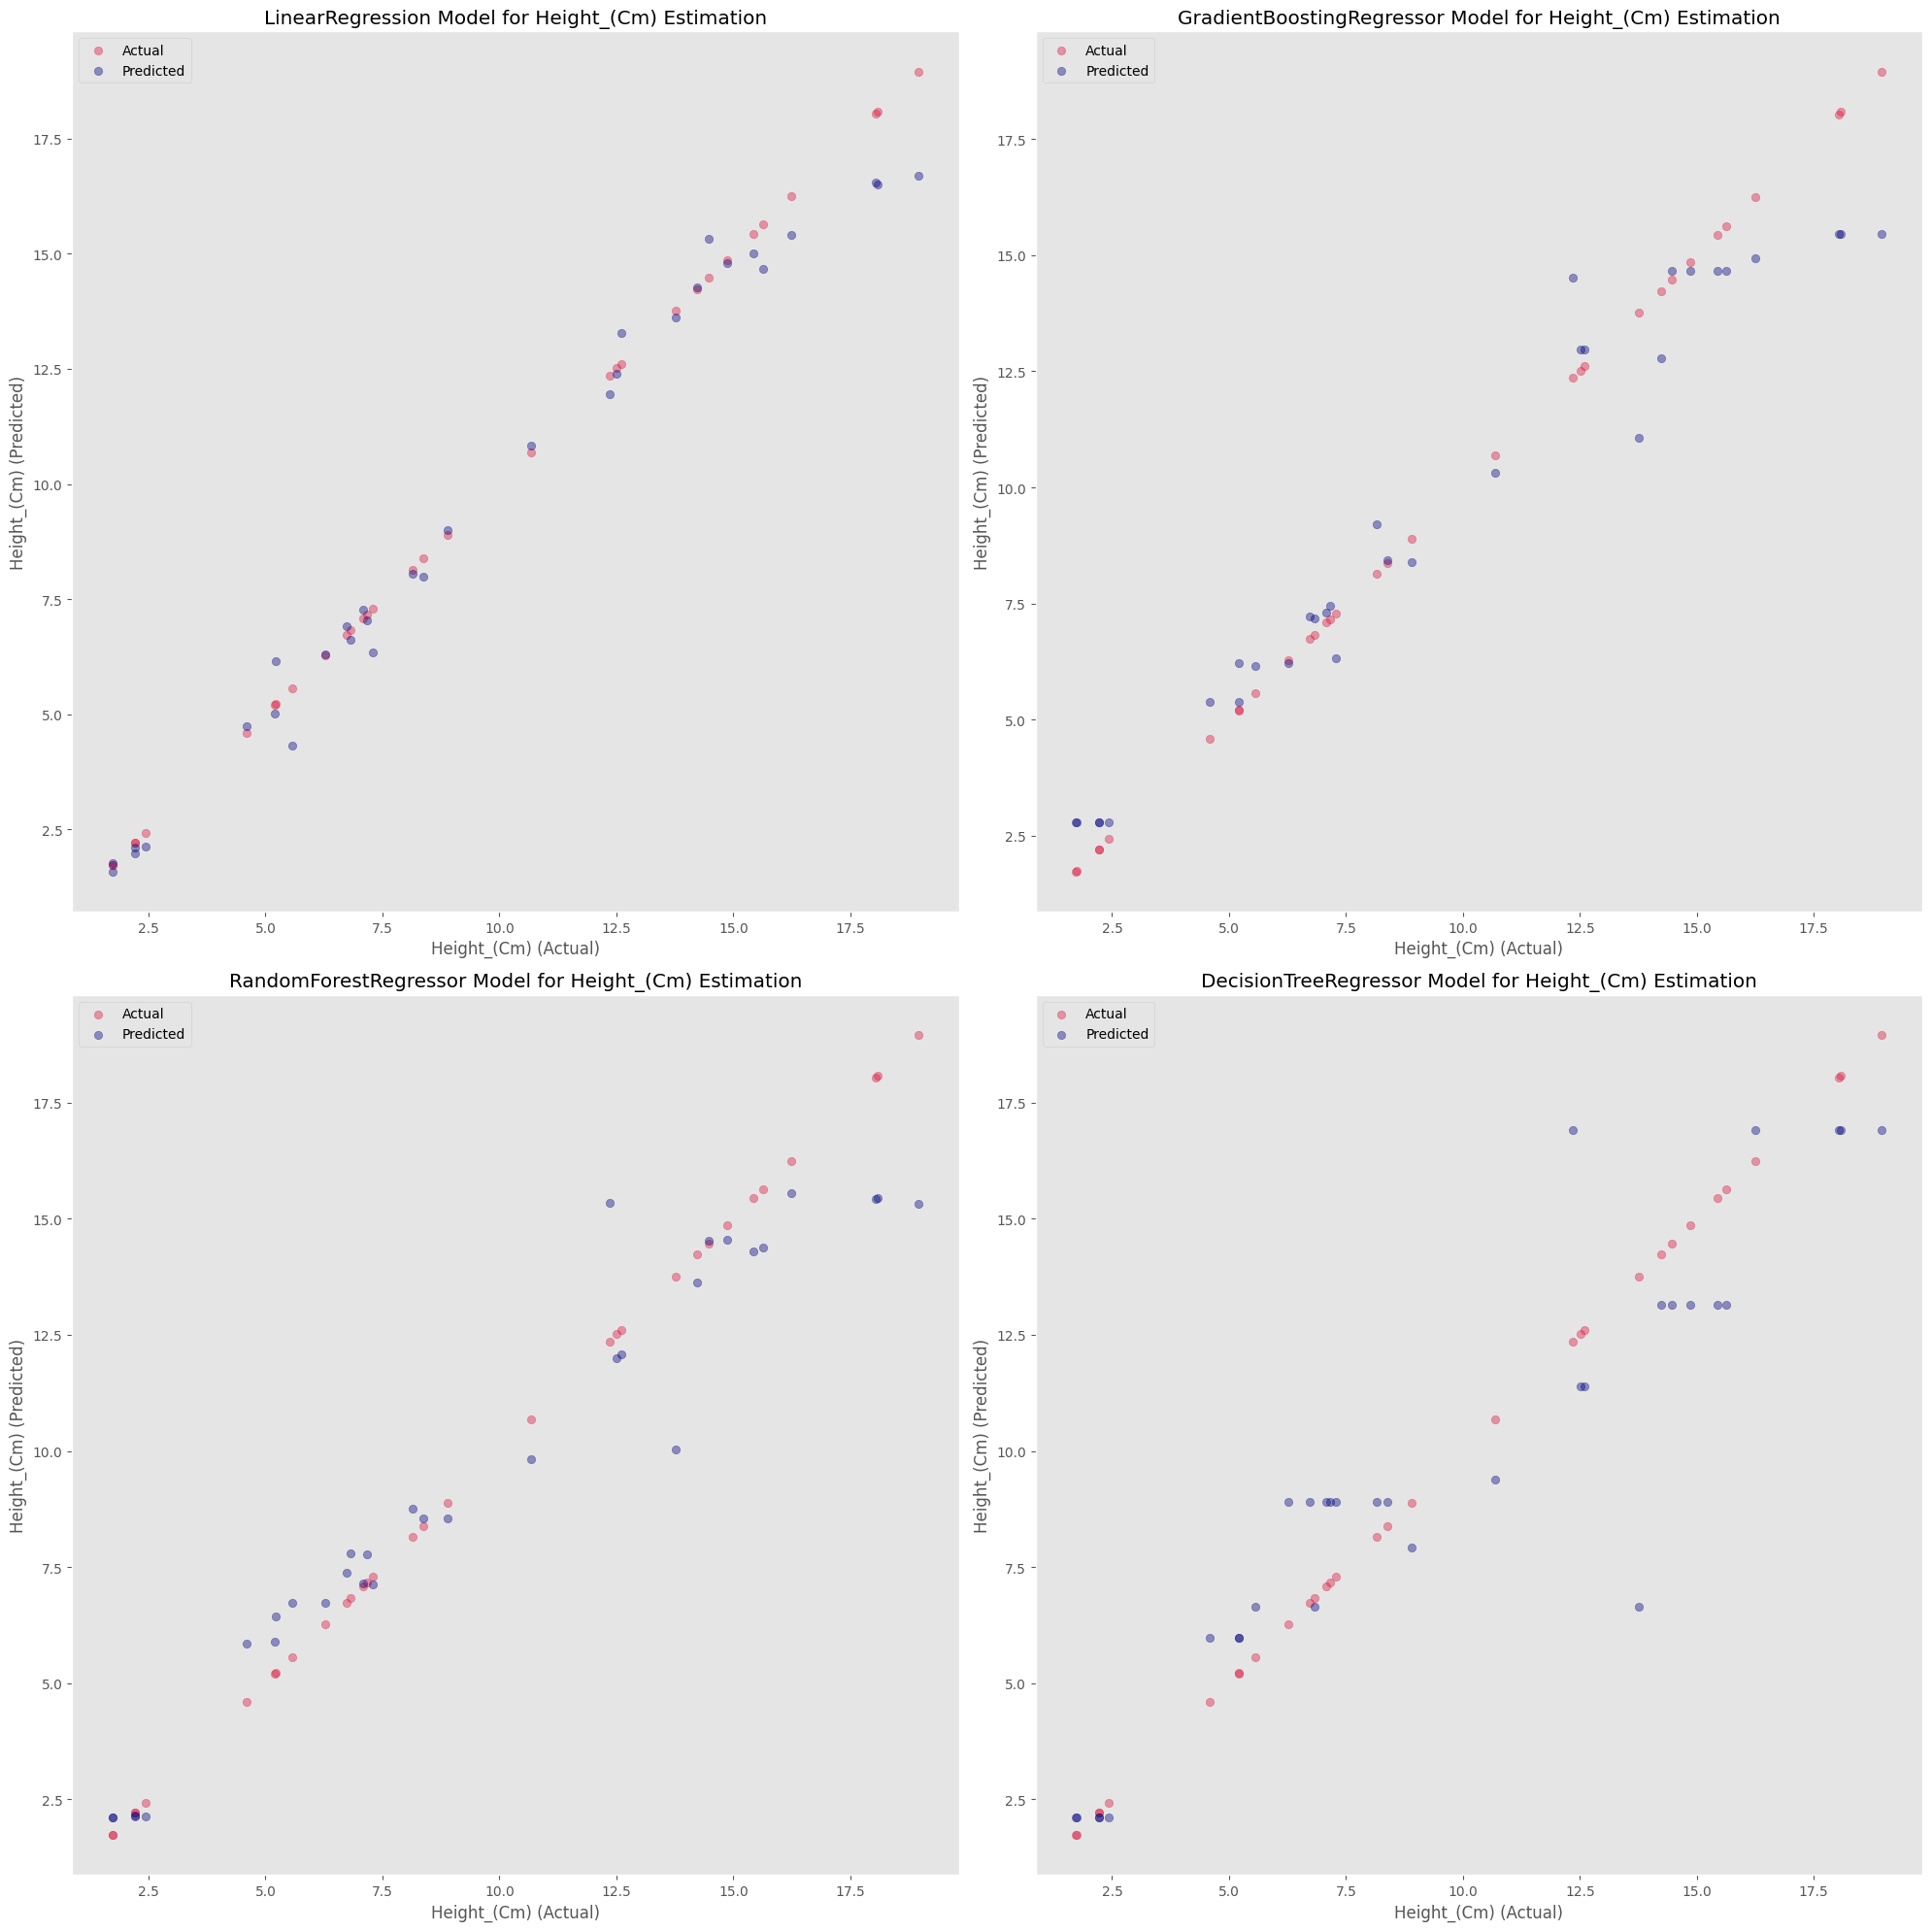

In [227]:
models('height_(cm)')

<div class="alert alert-block alert-info">
<b>Analysis:</b> For the prediction of fish height (height_(cm)), model performance remains strong but shows slightly more variation compared to other measurements. Linear Regression performed the best, achieving an R-squared of 0.9807, RMSE of 0.7263, and a score of 98.15%, indicating a high level of predictive accuracy. The Gradient Boosting and Random Forest regressors also produced good results (R² = 0.9410 and 0.9283, RMSE = 1.2700 and 1.3997, scores ≈ 95%), though not as high as Linear Regression. The Decision Tree model had the lowest performance (R² = 0.8541, RMSE = 1.9969, score = 90.67%), but still captured the general pattern in the data. Overall, while all models predict fish height with reasonable accuracy, Linear Regression stands out as the best performer, and the task appears somewhat more challenging for tree-based methods compared to other measurements.
</div>

-------------------- LinearRegression --------------------

The R-Squared value for LinearRegression is: 0.9633
The Adj R-Squared value for LinearRegression is: 0.9431
The RMSE value for LinearRegression is: 0.3588
The score for LinearRegression is: 96.38%

-------------------- GradientBoostingRegressor --------------------

The R-Squared value for GradientBoostingRegressor is: 0.9608
The Adj R-Squared value for GradientBoostingRegressor is: 0.9392
The RMSE value for GradientBoostingRegressor is: 0.3710
The score for GradientBoostingRegressor is: 98.28%

-------------------- RandomForestRegressor --------------------

The R-Squared value for RandomForestRegressor is: 0.9684
The Adj R-Squared value for RandomForestRegressor is: 0.9510
The RMSE value for RandomForestRegressor is: 0.3330
The score for RandomForestRegressor is: 98.10%

-------------------- DecisionTreeRegressor --------------------

The R-Squared value for DecisionTreeRegressor is: 0.9512
The Adj R-Squared value for Decisi

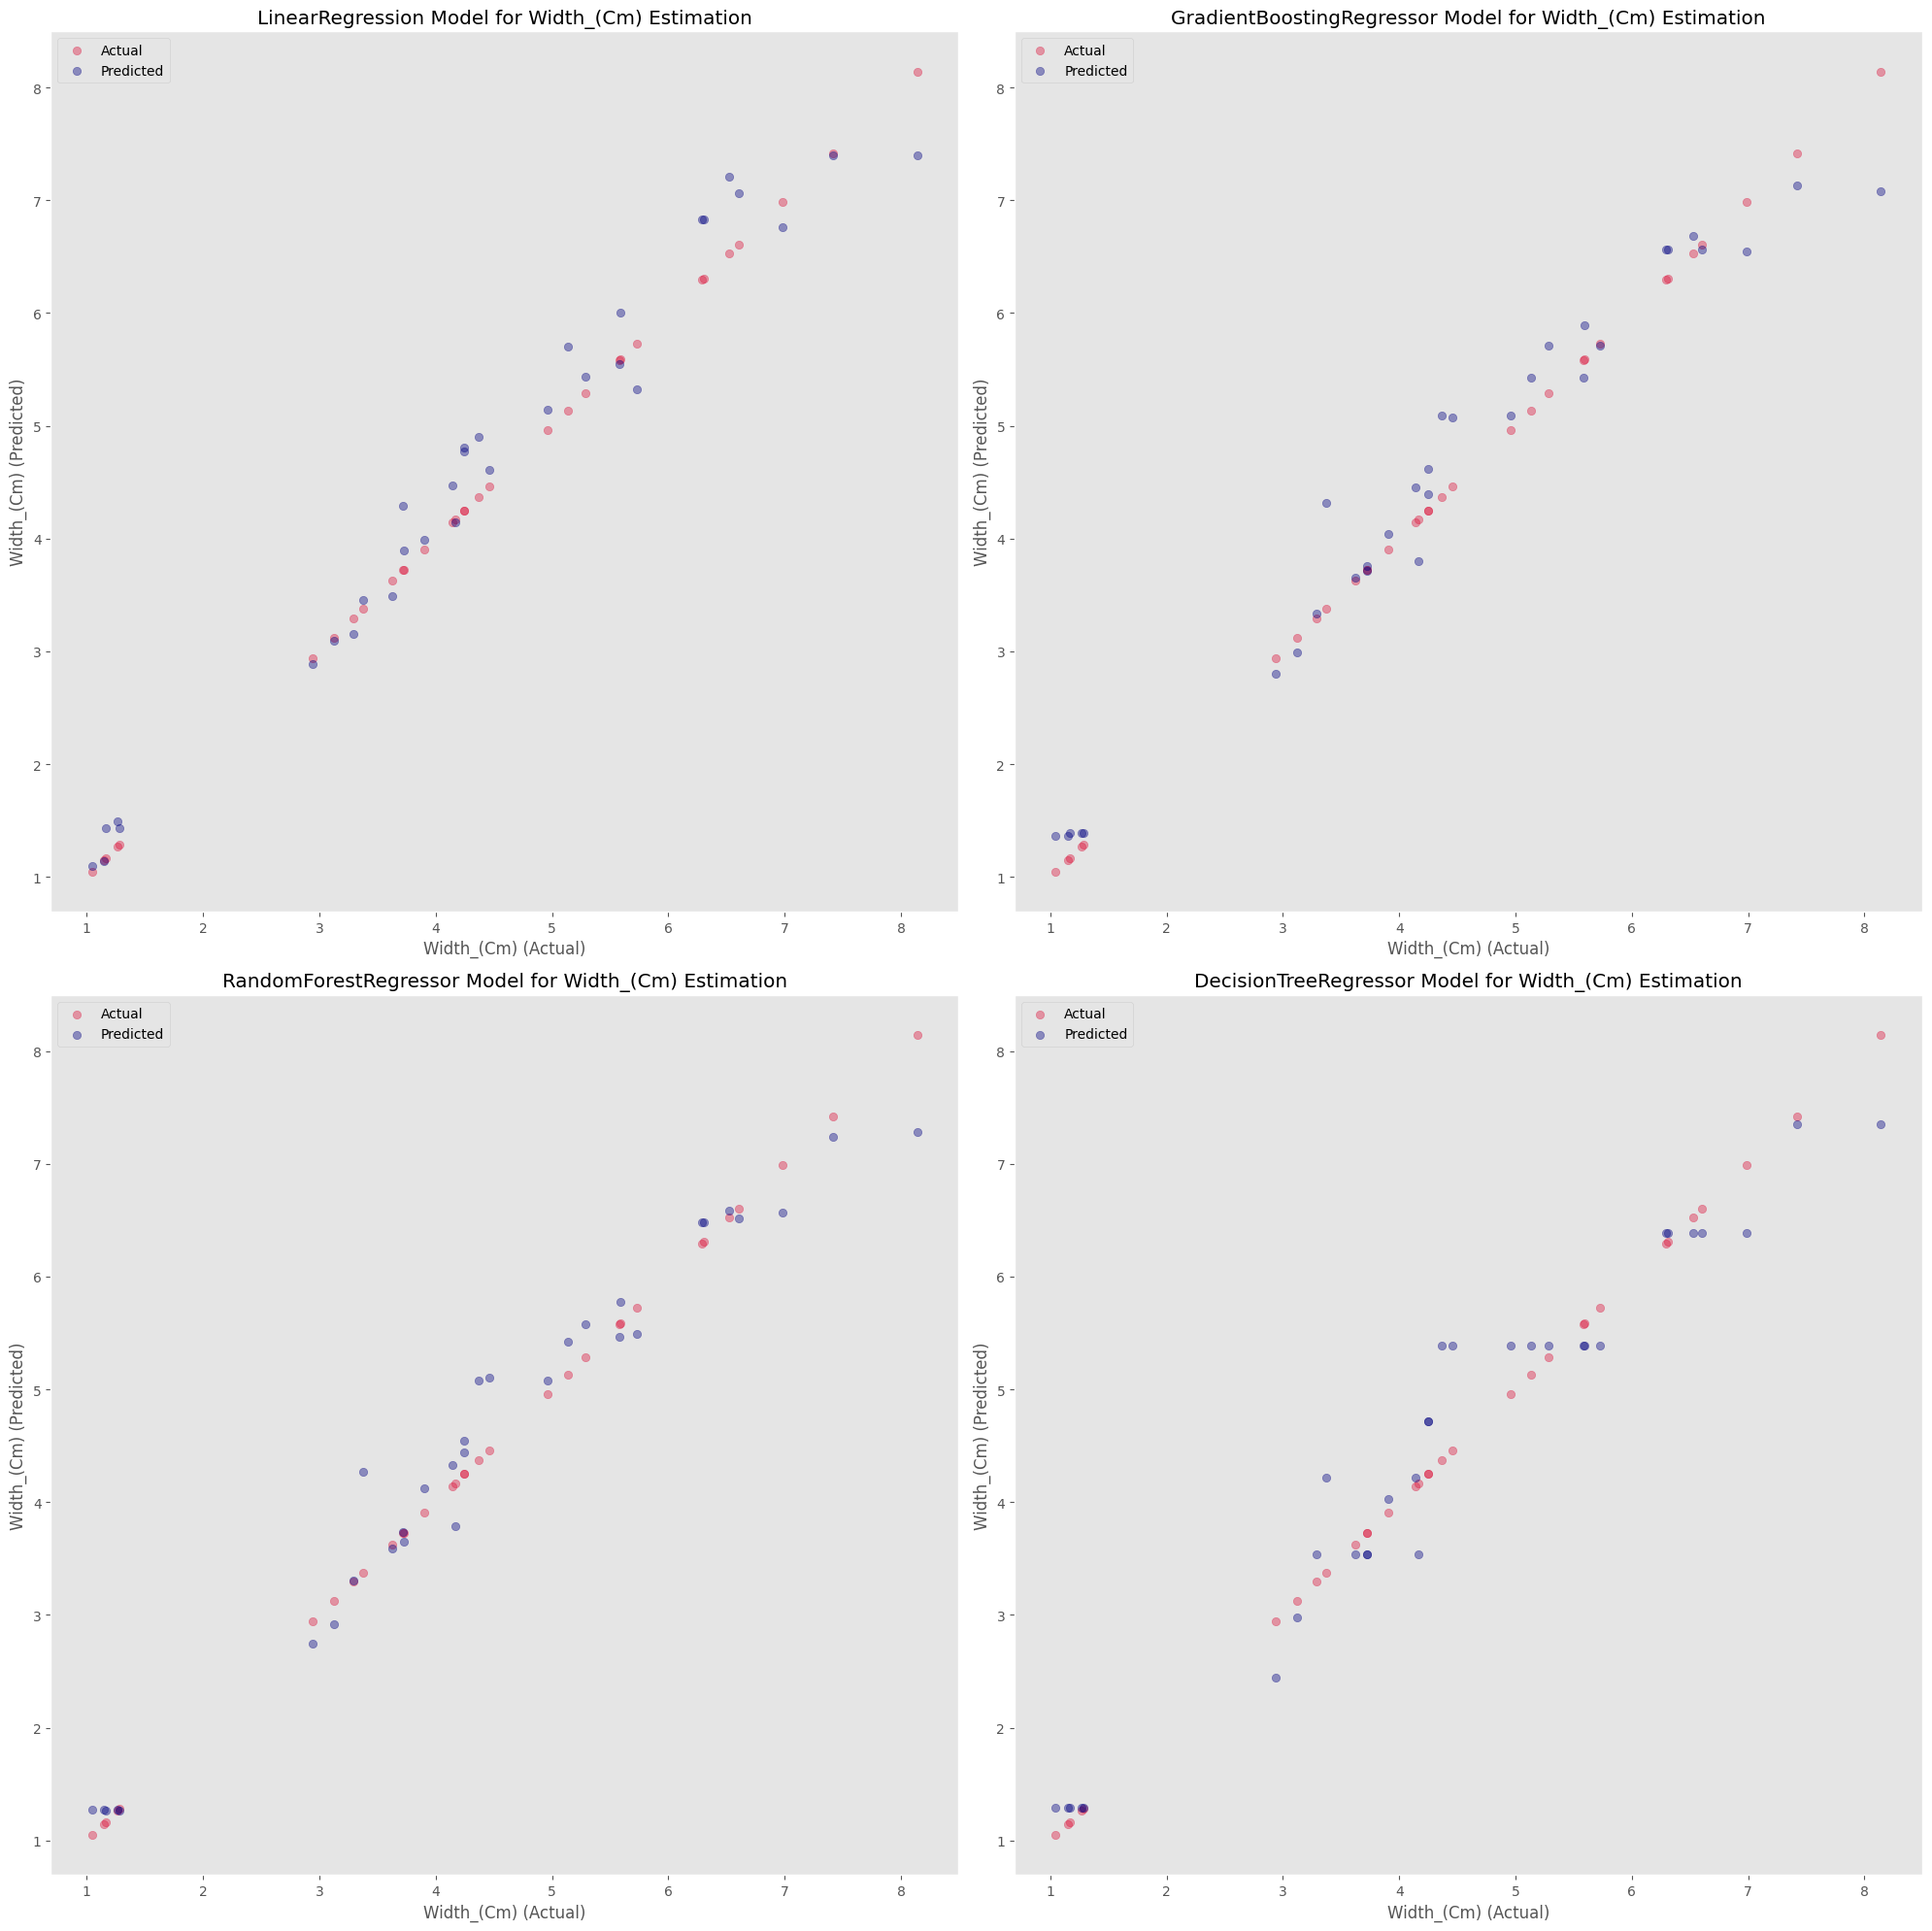

In [228]:
models('width_(cm)')

<div class="alert alert-block alert-info">
<b>Analysis:</b> For the prediction of fish width (width_(cm)), all models achieved strong results with R-squared values above 0.95, indicating a high level of accuracy. Random Forest delivered the best overall performance, with an R-squared of 0.9684, the lowest RMSE at 0.3330, and a score of 98.10%, closely followed by Linear Regression and Gradient Boosting, which also had R-squared values above 0.96 and low RMSE. The Decision Tree regressor performed slightly less well but still maintained an R-squared of 0.9512, RMSE of 0.4138, and a score of 97.66%. Overall, all regressors are able to predict fish width with high precision, with ensemble methods providing the most consistent accuracy for this measurement.
</div>